# New particle formation 

Report by group Huhtilainen

## Data exploration

Let's first redo some of the useful data exploration steps from course excercise set 1.

In [9]:
import pandas as pd

npf = pd.read_csv('npf_train.csv')

# Replace row indexes with content from the date column and remove id column.

npf['rownames'] = npf['date']
npf.set_index('rownames', inplace=True )
npf.drop(columns=['id'], inplace = True)

# Producing a numerical summary of the variables in the data set
npf.describe(include='all')
npf

date    class4  partlybad  CO2168.mean  CO2168.std  \
rownames                                                               
2000-02-23  2000-02-23  nonevent      False   380.528120    0.802001   
2000-03-25  2000-03-25        Ib      False   373.128684    1.096617   
2000-04-06  2000-04-06        Ib      False   372.363293    0.626329   
2000-04-11  2000-04-11  nonevent      False   381.437442    7.281159   
2000-04-23  2000-04-23        II      False   375.426310    3.264246   
...                ...       ...        ...          ...         ...   
2004-01-31  2004-01-31  nonevent      False   389.310533    1.384881   
2008-08-20  2008-08-20  nonevent      False   380.048926    6.127866   
2009-04-22  2009-04-22        Ib      False   392.901308    2.236589   
2006-12-12  2006-12-12  nonevent      False   387.960192    0.409426   
2009-11-19  2009-11-19  nonevent      False   401.640476    2.052212   

            CO2336.mean  CO2336.std  CO242.mean  CO242.std  CO2504.mean  ...  \
rownames                                                                 ...   
2000-02-23   380.371466    0.889550  381.816207   1.292593   380.296466  ...   
2000-03-25   372.980000    1.047750  373.701830   1.259198   372.910000  ...   
2000-04-06   372.245689    0.615803  372.847246   0.647279   372.193952  ...   
2000-04-11   381.380405    7.236002  381.926532   7.294374   381.381156  ...   
2000-04-23   375.436524    3.110886  375.740215   3.274924   375.337059  ...   
...                 ...         ...         ...        ...          ...  ...   
2004-01-31   389.320933    1.372439  389.411333   1.372157   389.308133  ...   
2008-08-20   380.105533    5.658127  381.673758   6.835401   379.888400  ...   
2009-04-22   392.738372    2.830582  393.167054   2.196588   392.839690  ...   
2006-12-12   388.007500    0.417034  388.179412   0.463350   387.972308  ...   
2009-11-19   400.852097    2.884182  402.276032   2.138372   399.988095  ...   

            T672.mean  T672.std   T84.mean   T84.std  UV_A.mean   UV_A.std  \
rownames                                                                     
2000-02-23 -10.730843  1.381815 -10.282754  1.870056   8.356761   4.534937   
2000-03-25  -2.095641  1.695622  -1.095864  2.090111  12.906779   7.022300   
2000-04-06   0.991521  1.914186   1.846503  1.954748  14.286261   9.572444   
2000-04-11   1.753414  0.340565   2.524931  0.414255   4.945162   3.405652   
2000-04-23  10.940107  2.179821  11.441893  3.048699  13.087014   9.771415   
...               ...       ...        ...       ...        ...        ...   
2004-01-31  -7.496622  0.669413  -7.008933  0.691314   1.021069   0.591618   
2008-08-20  14.797012  1.392316  15.460086  1.495813   7.786232   6.612248   
2009-04-22   3.663074  3.578209   4.659234  3.888751  16.759945  11.549429   
2006-12-12   2.895652  0.386139   3.355248  0.342563   1.173183   0.678359   
2009-11-19   3.131204  0.248498   3.287346  0.327367   1.978373   1.107727   

            UV_B.mean  UV_B.std   CS.mean    CS.std  
rownames                                             
2000-02-23   0.178084  0.123402  0.002546  0.000686  
2000-03-25   0.333523  0.239981  0.000662  0.000210  
2000-04-06   0.418313  0.344386  0.000541  0.000072  
2000-04-11   0.224159  0.192014  0.003710  0.001209  
2000-04-23   0.525591  0.476821  0.003680  0.002160  
...               ...       ...       ...       ...  
2004-01-31   0.018869  0.011991  0.006578  0.001036  
2008-08-20   0.380976  0.368811  0.004581  0.000499  
2009-04-22   0.731519  0.616226  0.002233  0.000316  
2006-12-12   0.019306  0.012448  0.000809  0.000029  
2009-11-19   0.050131  0.030889  0.002569  0.005078  

[430 rows x 103 columns]

In [10]:
# Removing the always false partlybad column
npf.drop(columns=['partlybad'], inplace = True)


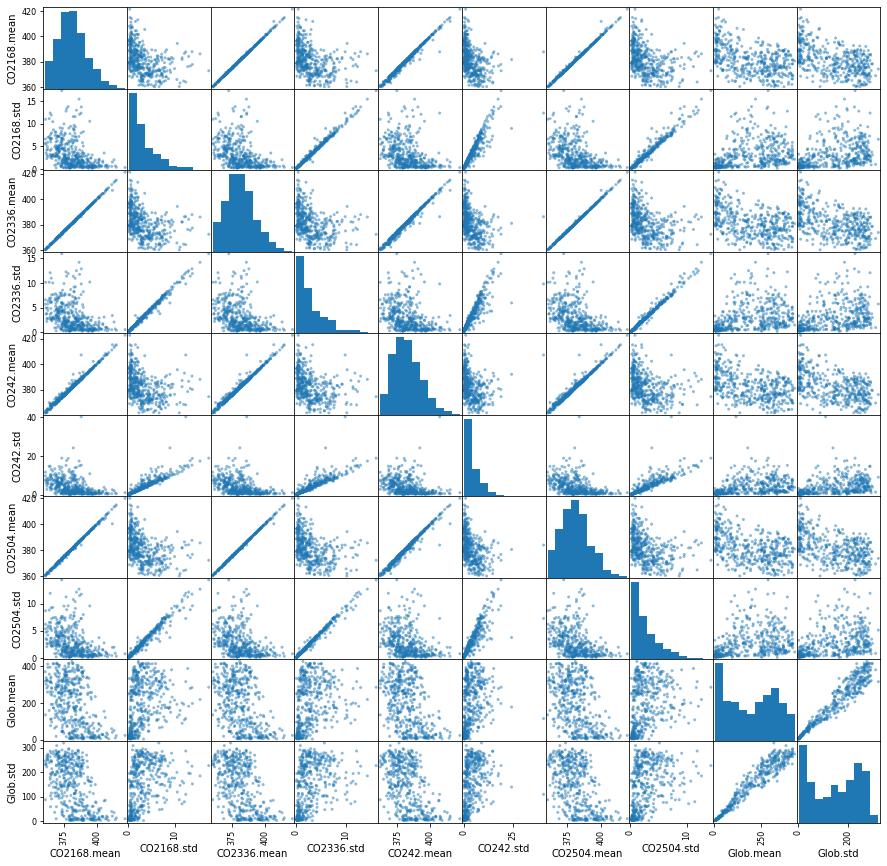

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#Producing a scatterplot matrix of the first ten columns or variables of the data.
X = npf.iloc[:, 2:12]
grr = pd.plotting.scatter_matrix(X, figsize=(15, 15), alpha=0.5)


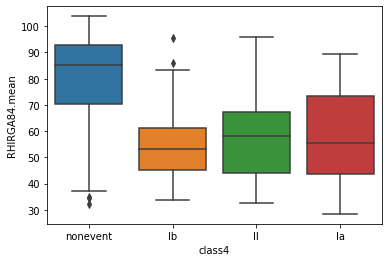

In [12]:
# Producing side-by-side boxplots of event vs. nonevent days

sns.boxplot(x="class4", y="RHIRGA84.mean", data=npf)

In [13]:
# Creating a new qualitative variable, called class2, which is “event” if there was a NPF event and “nonevent” otherwise. From the summary we can see that there are 215 event days.

npf['class2'] = npf['class4'].apply(lambda x: ('nonevent' if (x =='nonevent') else 'event'))
#npf.describe(include='all')

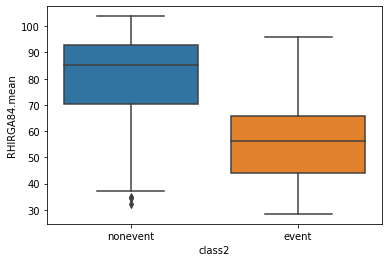

In [14]:
#  Producing side-by-side boxplots of RHIRGA84.mean versus event.
sns.boxplot(x="class2", y="RHIRGA84.mean", data=npf)

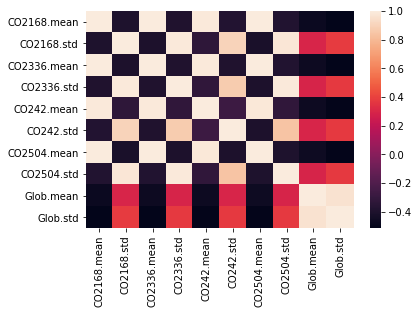

In [15]:
# Let's check some correlation and make a heatmaps

corr = X.corr()
sns.heatmap(corr)

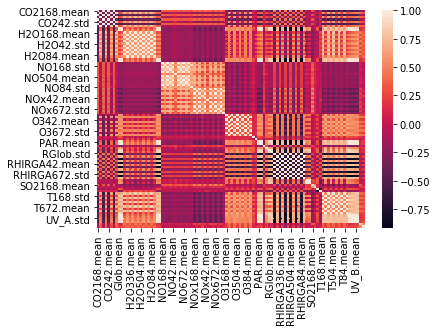

In [16]:
corr_all = npf.corr()
sns.heatmap(corr_all)

## Some initial thoughts

The data has a lot of features, whose meaning is not clear from the first glimpse. Most of the features are numerical.

The data seems to have some strongly correlating features, some extra information about these would be interesting.

Event and nonevent classes seem to differ at least in RHIRGA84 case. More investigations between the classes might be needed.

## Ideas from the partical formation paper

I browsed through the paper about particle formation (http://www.borenv.net/BER/archive/pdfs/ber10/ber10-323.pdf). One of the insights was that there is some seasonal changes. Maybe a month would be a good variable?

There was also some useful insights about the classes:

Class I: days when the growth and formation rate could be determined with a good confidence level
Class II: days when the accuracy was questionable

Additionally the Class I is divided:

Class Ia: very stong clear and strong events
Class Ib: rest of the Class I events

Let's see the amounts of the different events in the data:

In [17]:
target_amounts = npf.groupby(by=["class4"]).size()
target_amounts

class4
II          106
Ia           26
Ib           83
nonevent    215
dtype: int64

## Results from the exercise set 3

In exercises 3 the npf data was used to do clustering, PCA and test some classification algorithm without and with PCA. Here are my results.

### Cropping the data

It seems like a good idea to pick just the mean values from the data, so let's do that.


In [18]:
all_columns = list(npf.columns)
mean_X = npf.filter(col for col in all_columns if 'mean' in col)
feature_names = list(map(lambda x: x.replace('.mean', ''), list(mean_X.columns)))
mean_X.columns = feature_names
target = npf['class4']
mean_Xy = mean_X.join(target)
mean_Xy

CO2168      CO2336       CO242      CO2504        Glob  \
rownames                                                                 
2000-02-23  380.528120  380.371466  381.816207  380.296466  236.605353   
2000-03-25  373.128684  372.980000  373.701830  372.910000  252.480327   
2000-04-06  372.363293  372.245689  372.847246  372.193952  269.981547   
2000-04-11  381.437442  381.380405  381.926532  381.381156   68.364653   
2000-04-23  375.426310  375.436524  375.740215  375.337059  242.192619   
...                ...         ...         ...         ...         ...   
2004-01-31  389.310533  389.320933  389.411333  389.308133   11.828822   
2008-08-20  380.048926  380.105533  381.673758  379.888400  108.429644   
2009-04-22  392.901308  392.738372  393.167054  392.839690  297.594773   
2006-12-12  387.960192  388.007500  388.179412  387.972308   10.355311   
2009-11-19  401.640476  400.852097  402.276032  399.988095   23.973636   

               H2O168     H2O336      H2O42     H2O504     H2O672  ...  \
rownames                                                           ...   
2000-02-23   2.663504   2.695603   2.548879   2.694138   2.771071  ...   
2000-03-25   3.253684   3.232222   3.299150   3.228039   3.227712  ...   
2000-04-06   4.459042   4.422874   4.509760   4.409401   4.395988  ...   
2000-04-11   6.613430   6.568035   6.627225   6.579017   6.566474  ...   
2000-04-23   7.934171   7.882727   8.106183   7.859840   7.843690  ...   
...               ...        ...        ...        ...        ...  ...   
2004-01-31   3.564667   3.565600   3.580667   3.584533   3.555600  ...   
2008-08-20  14.532819  14.401400  14.754122  14.328067  14.248467  ...   
2009-04-22   3.581154   3.561860   3.616504   3.562791   3.557385  ...   
2006-12-12   6.281731   6.254808   6.394510   6.232115   6.212692  ...   
2009-11-19   7.282063   7.255968   7.276667   7.234286   7.264444  ...   

                   SWS       T168        T42       T504       T672        T84  \
rownames                                                                        
2000-02-23  936.605263 -10.272530 -10.489828 -10.346540 -10.730843 -10.282754   
2000-03-25  923.450980  -1.330589  -1.037435  -1.738455  -2.095641  -1.095864   
2000-04-06  923.410714   1.672108   1.893257   1.354012   0.991521   1.846503   
2000-04-11  918.862069   2.321829   2.610683   2.105324   1.753414   2.524931   
2000-04-23  919.629032  11.210545  11.415176  11.139711  10.940107  11.441893   
...                ...        ...        ...        ...        ...        ...   
2004-01-31  919.233333  -7.070356  -6.937178  -7.318444  -7.496622  -7.008933   
2008-08-20  886.806452  15.323398  15.469342  14.987379  14.797012  15.460086   
2009-04-22  920.532258   4.375232   4.608015   3.910895   3.663074   4.659234   
2006-12-12  922.190476   3.362174   3.348292   3.099441   2.895652   3.355248   
2009-11-19  907.428571   3.229828   3.259558   3.190246   3.131204   3.287346   

                 UV_A      UV_B        CS    class4  
rownames                                             
2000-02-23   8.356761  0.178084  0.002546  nonevent  
2000-03-25  12.906779  0.333523  0.000662        Ib  
2000-04-06  14.286261  0.418313  0.000541        Ib  
2000-04-11   4.945162  0.224159  0.003710  nonevent  
2000-04-23  13.087014  0.525591  0.003680        II  
...               ...       ...       ...       ...  
2004-01-31   1.021069  0.018869  0.006578  nonevent  
2008-08-20   7.786232  0.380976  0.004581  nonevent  
2009-04-22  16.759945  0.731519  0.002233        Ib  
2006-12-12   1.173183  0.019306  0.000809  nonevent  
2009-11-19   1.978373  0.050131  0.002569  nonevent  

[430 rows x 51 columns]

Let's make the target values numeric, and let's see how they are mapped:

In [19]:
npf_y_categoric = npf.astype({'class4': 'category'})
category_to_numeric = npf_y_categoric.select_dtypes(['category']).columns
nfp_target_numeric = npf_y_categoric [category_to_numeric].apply(lambda x: x.cat.codes)
target_numeric = nfp_target_numeric['class4']

target_list = list(target_numeric) # y as an array of numbers
class_codes = dict(zip(nfp_target_numeric['class4'], npf['class4']))
class_codes # dictionary of class4 names and corresponding numbers

{3: 'nonevent', 2: 'Ib', 0: 'II', 1: 'Ia'}

### K-means clustering

Let's then try K-means to see if there are some clusters in the data.

Let's first consider the amount of loss with different cluster sizes. Let's make a vector of cluster amounts, and model for each. The whiten function normalises the features. 

When the means are scaled, the calculated losses of the models are smaller and he curve is smoother and comes down slower. The biggest step seems to be around two clusters, or three clusters, after that the curve is quite smooth. It seems that the fourth cluster is not so well defined.

In [103]:
from sklearn.cluster import KMeans
import scipy
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.optimize import linear_sum_assignment
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.vq import vq, kmeans, whiten
from sklearn.preprocessing import scale

n_clusters = list(range(1, 21))
k_means_losses_non_scaled = []
k_means_losses_scaled = []

for i in n_clusters:
    
    centers_ns, loss_ns = kmeans(mean_X, i)
    k_means_losses_non_scaled.append(loss_ns)
    
    whitened = whiten(mean_X)
    centers_scaled, loss_scaled = kmeans(whitened, i)
    k_means_losses_scaled.append(loss_scaled)
   

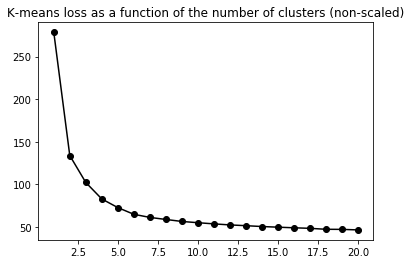

In [104]:
plt.figure()
plt.scatter(n_clusters, k_means_losses_non_scaled,color="black")
plt.plot(n_clusters, k_means_losses_non_scaled,color="black")
plt.title('K-means loss as a function of the number of clusters (non-scaled)')
plt.show()    

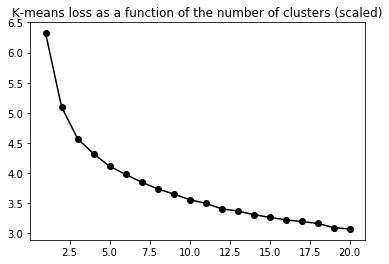

In [105]:
plt.figure()
plt.scatter(n_clusters,k_means_losses_scaled,color="black")
plt.plot(n_clusters,k_means_losses_scaled,color="black")
plt.title('K-means loss as a function of the number of clusters (scaled)')
plt.show()  

Let's then make some clustering with four clusters that represent the four classes in the data, and plot confusion matrices of the clusters. Let's try two different approaches to find permutation of the cluster labels. Let's first take cluster labels from the most common label of the target values. 

Permutations: ['nonevent', 'nonevent', 'nonevent', 'II']


Text(0.5, 15.0, 'Predicted label')

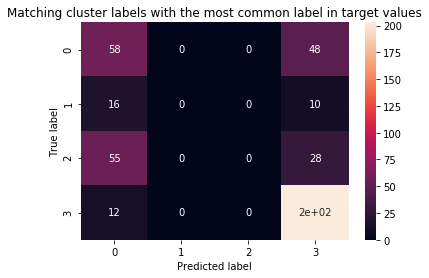

In [106]:
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        # Choose the most common label among data points in the cluster
        new_label=scipy.stats.mode(real_labels[idx])[0][0]
        permutation.append(new_label)
    return permutation

model_scaled_four = KMeans(4, random_state=0).fit(scale(mean_X))
permutations = find_permutation(4, target, model_scaled_four.labels_)
print('Permutations:', permutations)
new_labels = [ permutations[label] for label in model_scaled_four.labels_ ] 
confusion = confusion_matrix(target, new_labels)
sns.heatmap(confusion, annot=True)
plt.title('Matching cluster labels with the most common label in target values')
plt.ylabel('True label')
plt.xlabel('Predicted label')

With this approach it seams that nonevents are recognised very well, and class II quite well, but both classes Ia and IB are misclassified as nonevents. This is curious, as these classI instances should be particularly clearly different from nonevents. 

Let's try to make another approach. I just wonder are the clusters really representing the actual classes when the previous results with perumutation were as they were. How ever, let's now do confusion map with maximised diagonals.

First let's plot the original confusion matrix, then calculate the permutation

Text(0.5, 15.0, 'Predicted label')

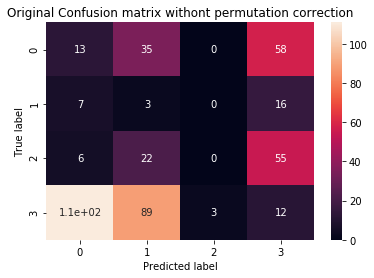

In [107]:
confusion_orig = confusion_matrix(target_list, model_scaled_four.labels_)
sns.heatmap(confusion_orig, annot=True)
plt.title('Original Confusion matrix withont permutation correction')
plt.ylabel('True label')
plt.xlabel('Predicted label')

[0 1 2 3]
[1 2 3 0]
{1: 0, 2: 1, 3: 2, 0: 3}


Text(0.5, 15.0, 'Predicted label')

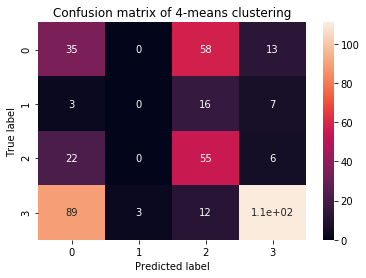

In [184]:
row_ind, col_ind  = linear_sum_assignment(confusion_orig, maximize=True)
print(row_ind)
print(col_ind)
perm_dict = {col_ind[i]: row_ind[i] for i in range(len(row_ind))}
print(perm_dict)
hungary_labels = [perm_dict.get(i) for i in model_scaled_four.labels_]
confusion_hungary = confusion_matrix(target_list, hungary_labels)
sns.heatmap(confusion_hungary, annot=True)
plt.title('Confusion matrix of 4-means clustering')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [64]:
class_codes # dictionary of class4 names and corresponding numbers

{3: 'nonevent', 2: 'Ib', 0: 'II', 1: 'Ia'}

Now we see clusters where nonevents are quite well recocnised, though partly missclassified as class II. Class Ia has quite few samples, and is not recognised at all. I don't think the clustering works particularly well in this case.

### Hierarchical clustering

Let's then see what hierarchical clustering can tell us. I will first do hierarchical clustering models with average and ward linkaging. Both of the threes become quite large, 430 clusters in each. When plotted, the ward model looks more promising.

Average model cluster amount: 430
Ward model cluster amount: 430


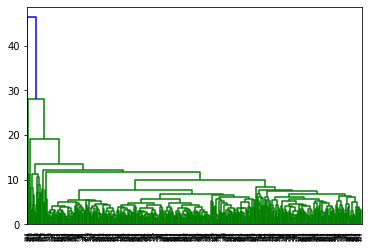

In [109]:
from sklearn.cluster import AgglomerativeClustering

hier_model_average = AgglomerativeClustering(n_clusters= None, linkage='average', affinity='euclidean', distance_threshold=0).fit(scale(mean_X))
hier_model_ward = AgglomerativeClustering(n_clusters= None, linkage='ward', affinity='euclidean',distance_threshold=0).fit(scale(mean_X))

print('Average model cluster amount:', hier_model_average.n_clusters_)
print('Ward model cluster amount:', hier_model_ward.n_clusters_)

from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
    
plot_dendrogram(hier_model_average)  


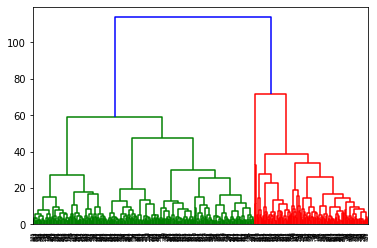

In [67]:
plot_dendrogram(hier_model_ward) 

Let's make the cutted trees to see more clearly the main clusters

Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis).')

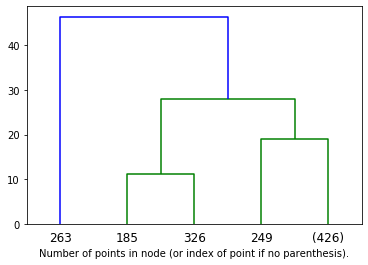

In [68]:
plot_dendrogram(hier_model_average, truncate_mode='level', p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis).')

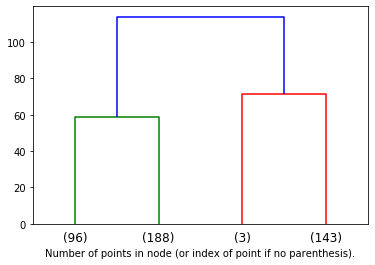

In [69]:
plot_dendrogram(hier_model_ward, truncate_mode='level', p=1)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

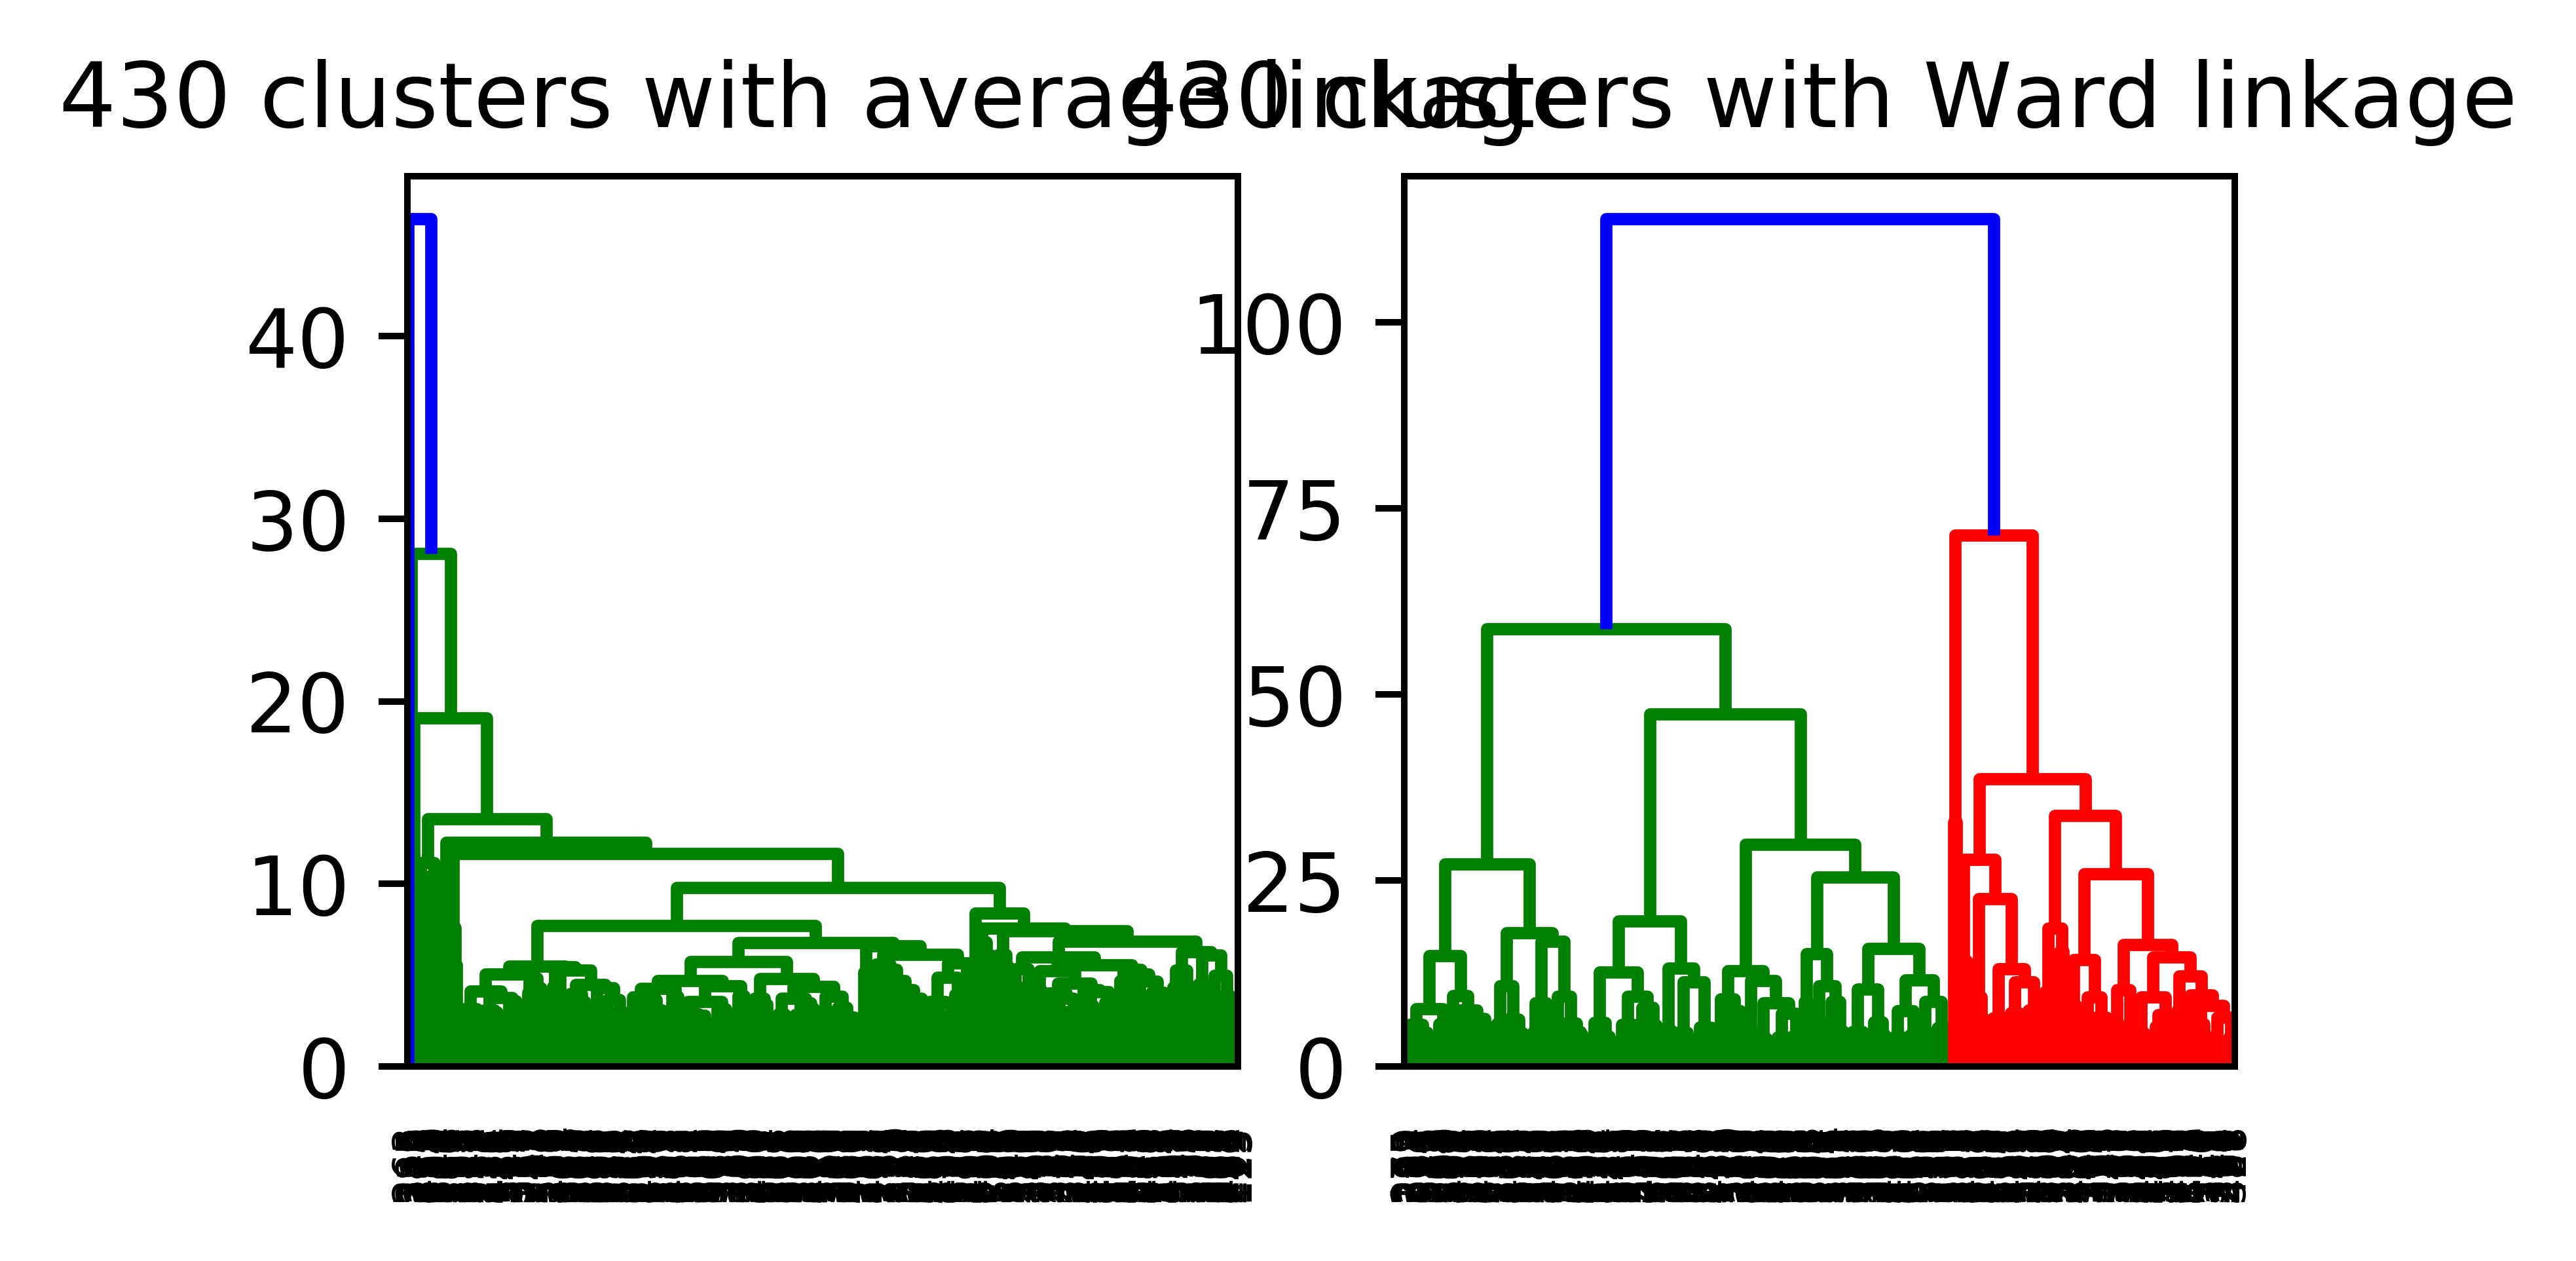

In [122]:
fig, axes = plt.subplots(nrows = 1,ncols = 2,figsize = (4,2), dpi=900)
plot_dendrogram(hier_model_average, ax = axes[0])
plot_dendrogram(hier_model_ward, ax = axes[1]) 
axes[0].set_title('430 clusters with average linkage', fontsize = 11)
axes[1].set_title('430 clusters with Ward linkage', fontsize = 11)

fig.savefig('npf-hier-full.png')

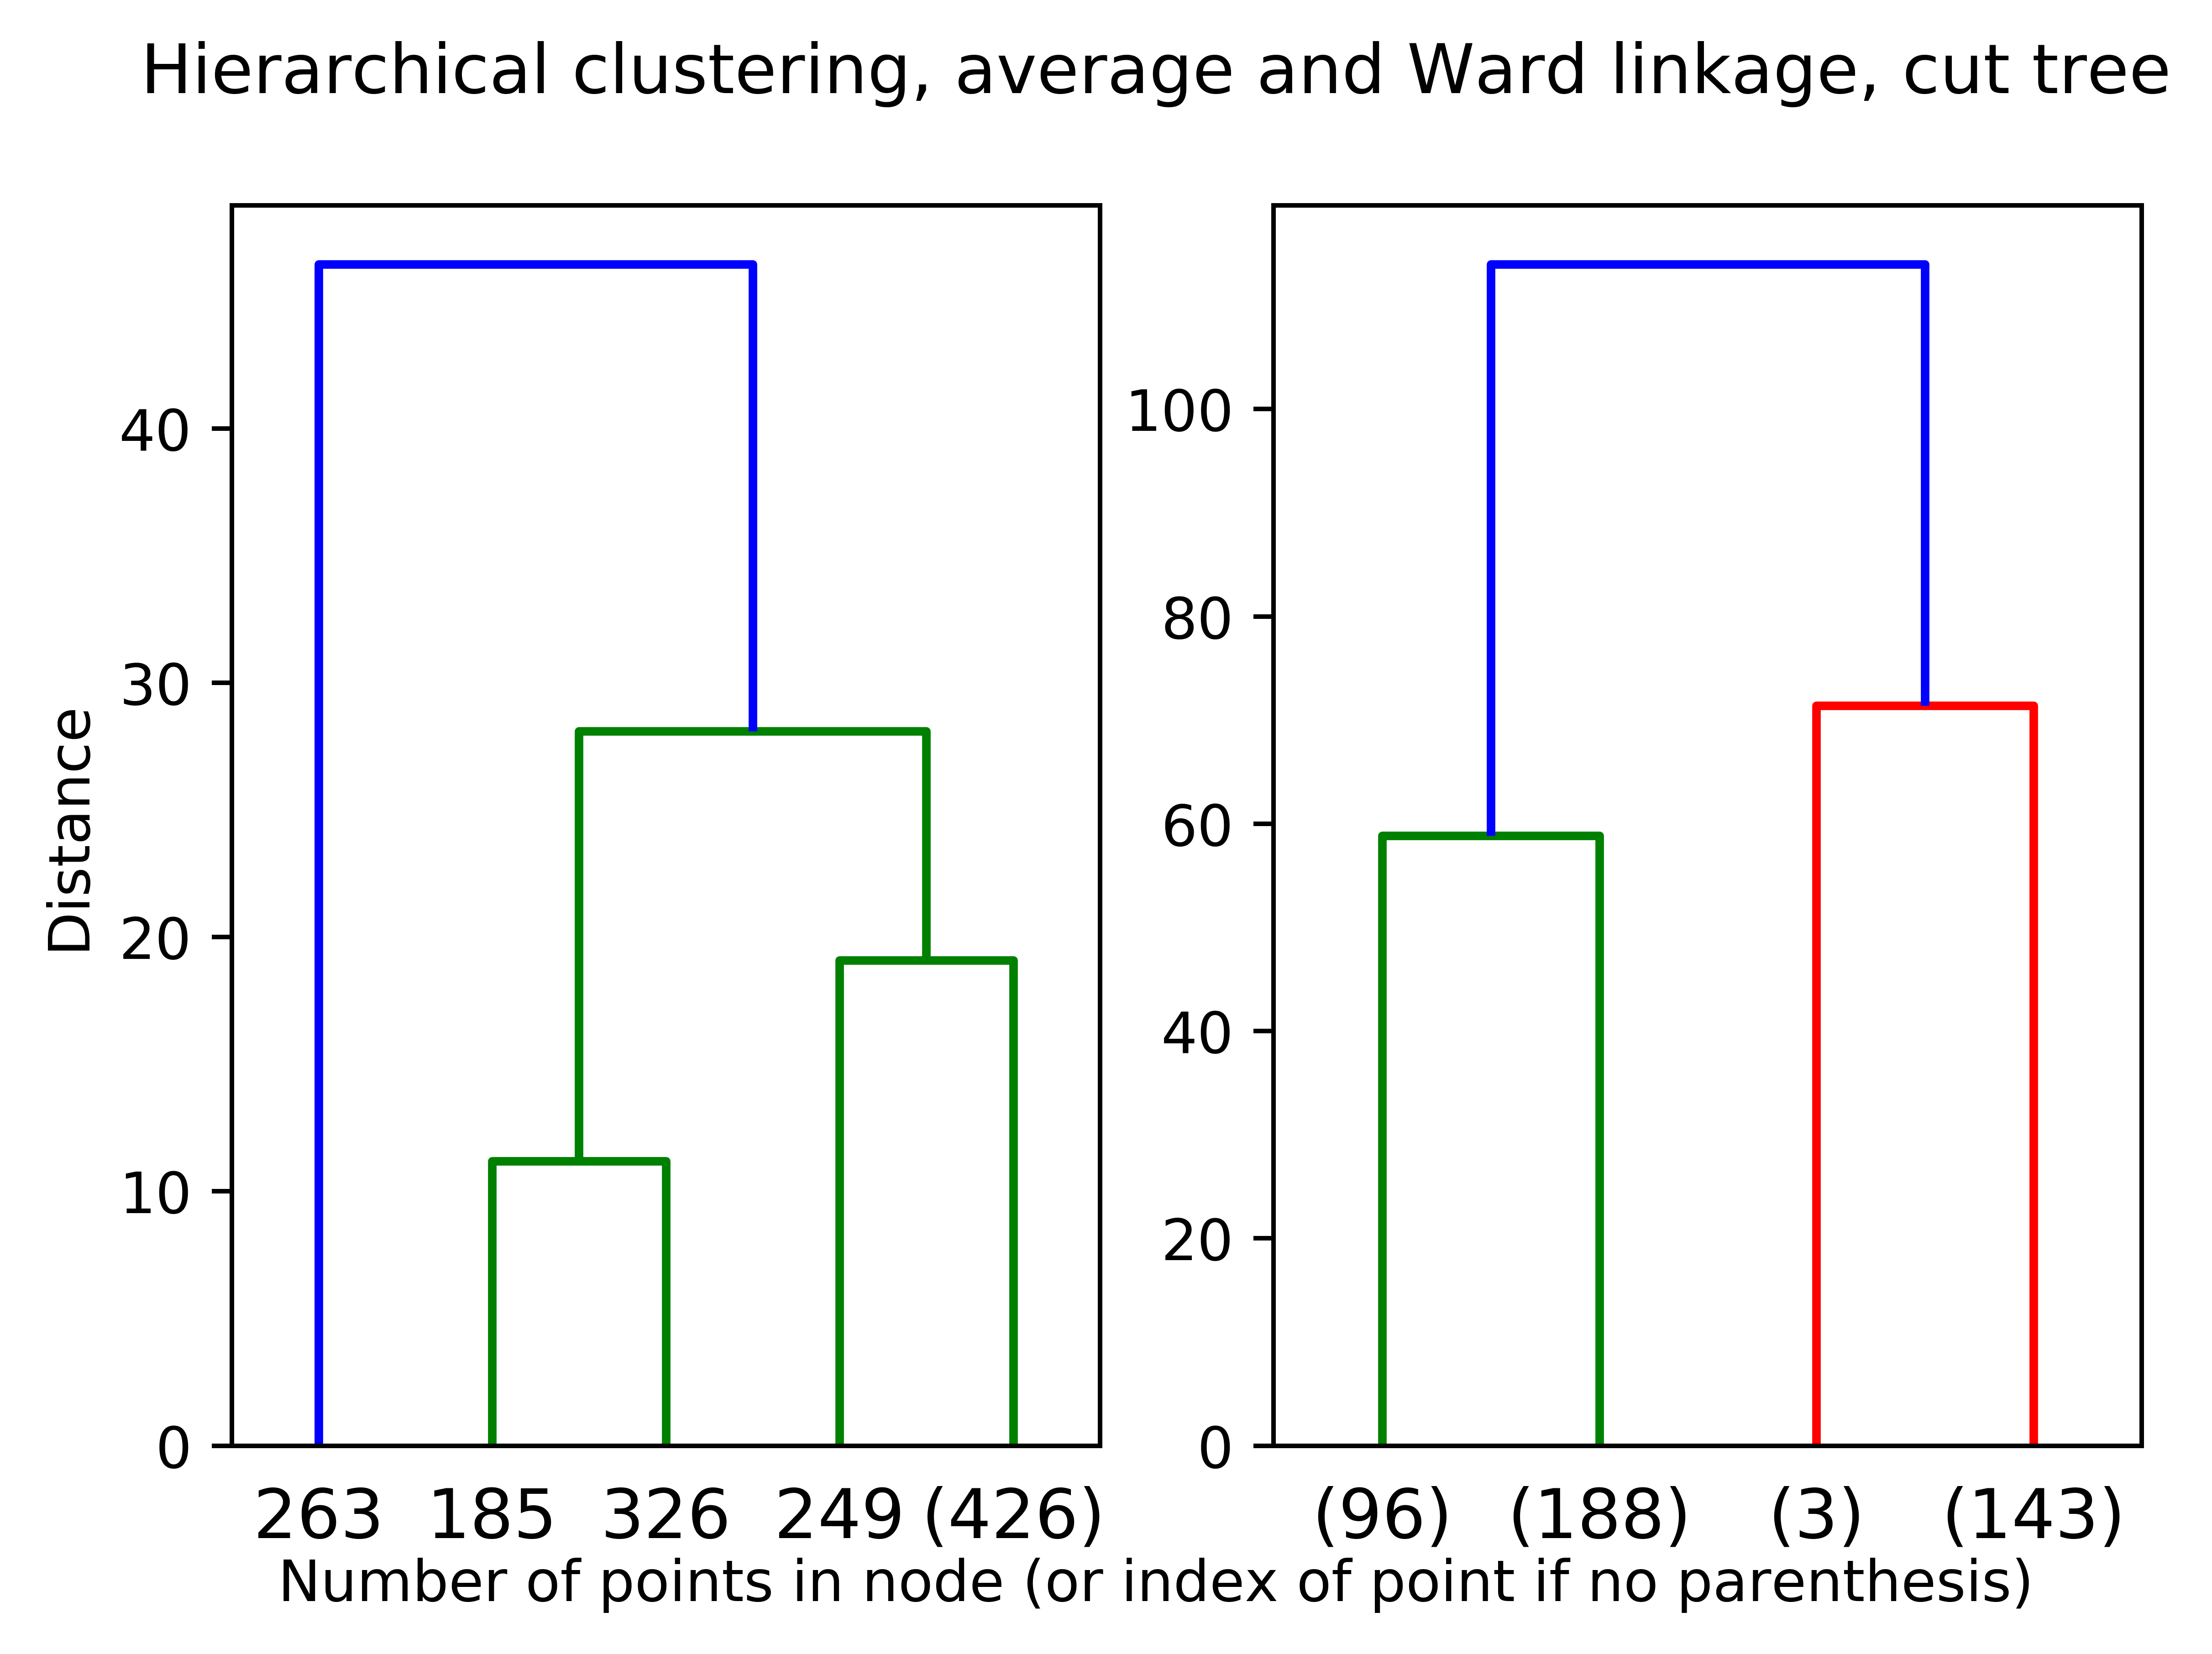

In [126]:
fig, axes = plt.subplots(nrows = 1,ncols = 2, dpi=900)
plot_dendrogram(hier_model_average, truncate_mode='level', p=2, ax = axes[0])
plot_dendrogram(hier_model_ward, truncate_mode='level', p=1, ax = axes[1])
axes[0].set_ylabel("Distance")
#axes[0].set_title("Hierarchical clustering, average linkage, cut tree", fontsize = 11)
#axes[1].set_title("Hierarchical clustering, Ward linkage, cut tree", fontsize = 11)
fig.suptitle('Hierarchical clustering, average and Ward linkage, cut tree', fontsize='large')
fig.text(0.5, 0.04, 'Number of points in node (or index of point if no parenthesis)', ha='center', va='center')
fig.savefig('npf-hier-cut.png')

[0 1 2 3]
[3 2 0 1]
{3: 0, 2: 1, 0: 2, 1: 3}


Text(0.5, 15.0, 'Predicted label')

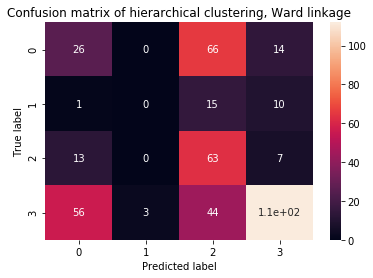

In [182]:
hier_model_ward_four = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean').fit(scale(mean_X))
hier_conf = confusion_matrix(target_list, hier_model_ward_four.labels_)
row_ind_hier, col_ind_hier  = linear_sum_assignment(hier_conf, maximize=True)
print(row_ind_hier)
print(col_ind_hier)
perm_dict_hier = {col_ind_hier[i]: row_ind_hier[i] for i in range(len(row_ind))}
print(perm_dict_hier)
hungary_labels_hier = [perm_dict_hier.get(i) for i in hier_model_ward_four.labels_]
confusion_hungary_hier = confusion_matrix(target_list, hungary_labels_hier)
sns.heatmap(confusion_hungary_hier, annot=True)
plt.title('Confusion matrix of hierarchical clustering, Ward linkage')
plt.ylabel('True label')
plt.xlabel('Predicted label')

We can see that the two different linkages produce totally different clusters, the average performs quite poorly as most of the nodes are in the one leaf in the right. The ward produces nice looking result for four clusters.

### PCA

Let's try primary component analysis with the mean features. Let's first plot the observations in by reducing PCA to two components.


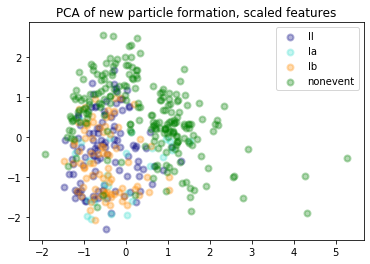

In [24]:
from sklearn.decomposition import PCA

target_names = ['II', 'Ia', 'Ib', 'nonevent']
target_array= target_numeric.to_numpy()

means_pca_scaled = PCA(n_components=2, whiten=True).fit(scale(mean_X))
transformed_pca_sca = means_pca_scaled.transform(scale(mean_X))
plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'green']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(transformed_pca_sca[target_array == i, 0], transformed_pca_sca[target_array == i, 1], color=color, alpha=.3, lw=lw,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of new particle formation, scaled features')
plt.show()


Text(0.5, 0, 'Number of components')

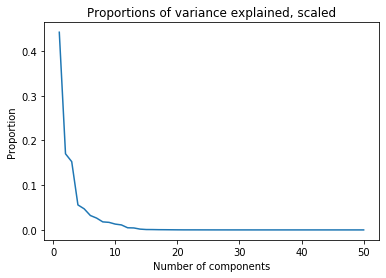

In [129]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

means_pca_scaled = PCA().fit(scale(mean_X))
var_scaled = means_pca_scaled.explained_variance_
plt.plot(np.arange(1,51), var_scaled/sum(var_scaled))
plt.title('Proportions of variance explained, scaled')
plt.ylabel('Proportion')
plt.xlabel('Number of components')    

When PCA is reduced to two components, the  the nonevents seem to separate quite well from the other classes in the plot.

### Decision tree classifier

Here again some resulst from my exercise set three.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_validate, y_train, y_validate = train_test_split(mean_X, npf['class4'], test_size=0.50, random_state=0)
clf_all_features_dtc = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
pred_class_all_feat_dtc = clf_all_features_dtc.predict(X_validate)

print('Decision tree prediction with defaults and all features gives accuracy score:',
          round(accuracy_score(y_validate, pred_class_all_feat_dtc), 2))


Decision tree prediction with defaults and all features gives accuracy score: 0.65


In [130]:
clf_all_features_dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [141]:
clf_all_features_dtc.get_depth()

10

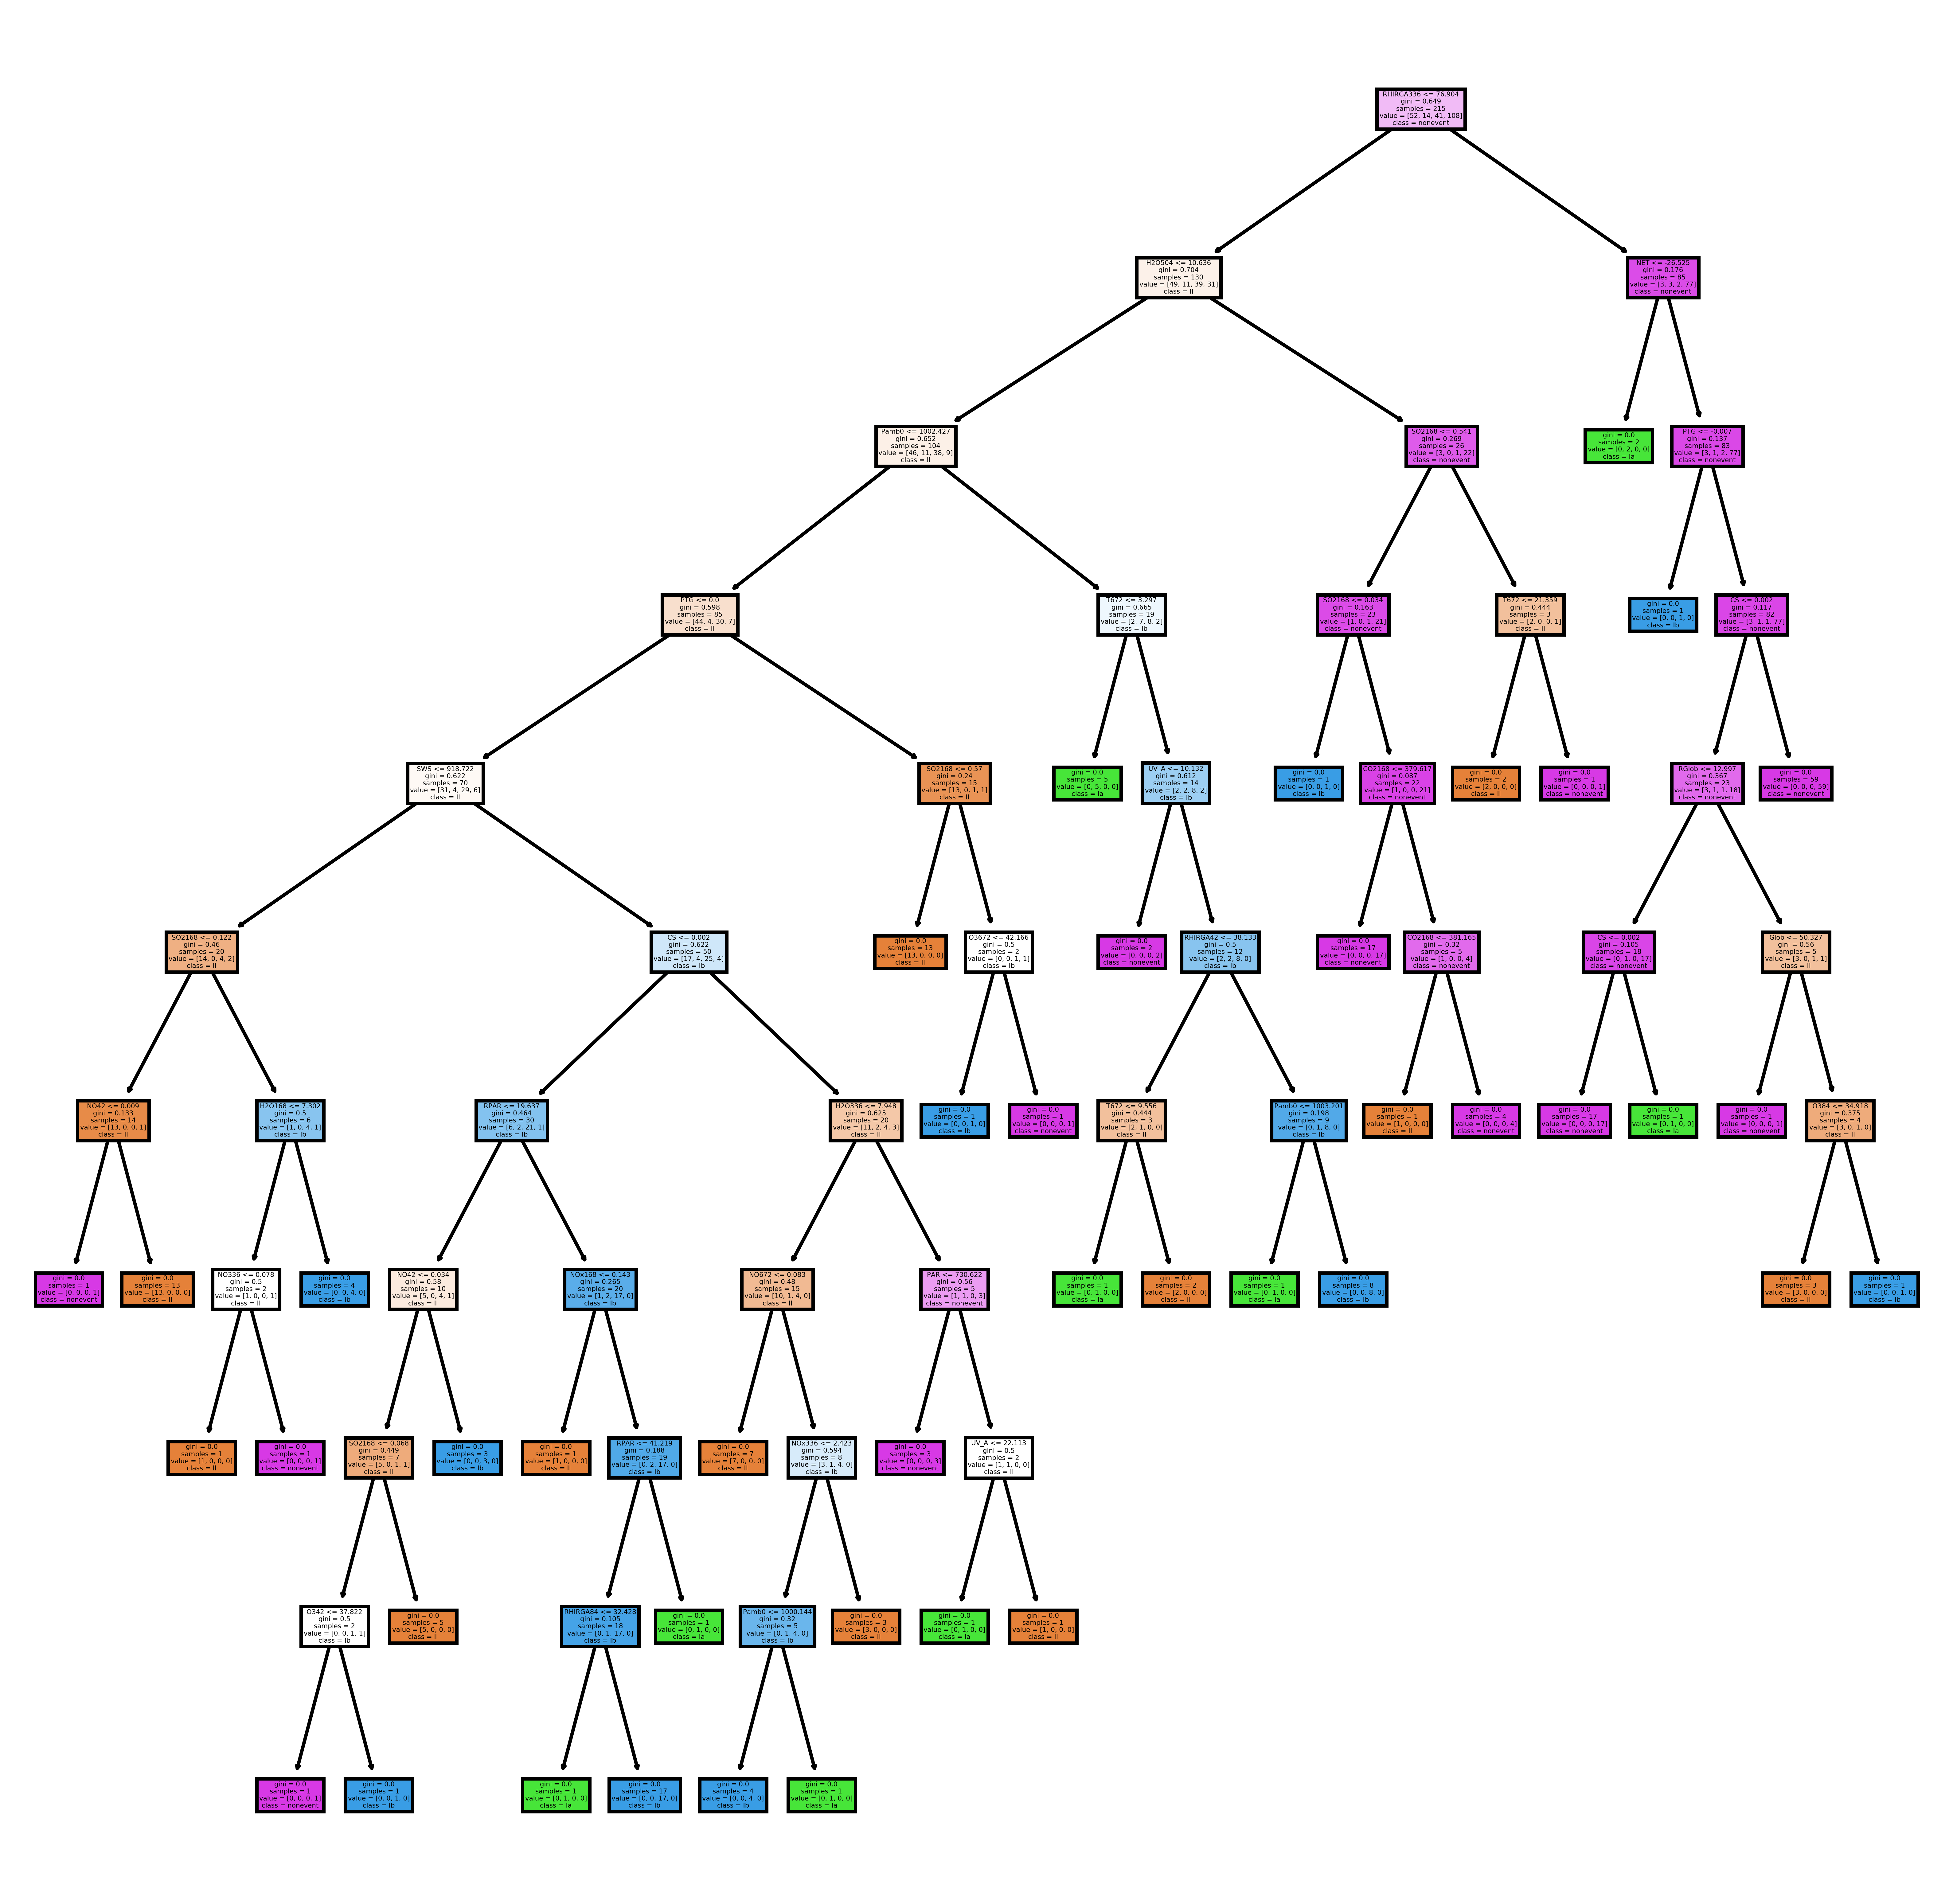

In [139]:
from sklearn import tree

cn=['II', 'Ia', 'Ib', 'nonevent']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=800)
tree.plot_tree(clf_all_features_dtc,
               feature_names = feature_names, 
               class_names=cn,
               filled = True)
#plt.legend(loc='best', shadow=False)
plt.show()

In [140]:
fig.savefig('npf_dtc.png')

So the three class classification accuracy with a decision tree is not too good, it's around 65%.

Let's then do the fitting of PCA on training set with different amounts of components and make models with them, and calculate and plot accuracies. 

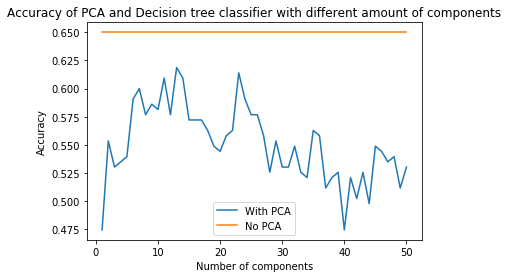

In [72]:
from sklearn.decomposition import PCA

dtc_pca_scores = []
n_components = list(range(1, 51))
no_pca_y =[0.65]*50

for i in n_components:
    pca = PCA(n_components=i).fit(scale(X_train))
    train_transf = pca.transform(scale(X_train))
    valid_transf = pca.transform(scale(X_validate))
    dtc = DecisionTreeClassifier(random_state=0).fit(train_transf, y_train)
    pred = dtc.predict(valid_transf)
    score = accuracy_score(y_validate, pred)
    dtc_pca_scores.append(score)

plt.plot(np.arange(1,51), dtc_pca_scores, label="With PCA")
plt.plot(np.arange(1,51), no_pca_y, label="No PCA")
plt.title('Accuracy of PCA and Decision tree classifier with different amount of components')
plt.ylabel('Accuracy')
plt.xlabel('Number of components')    
plt.legend(loc='best', shadow=False, scatterpoints=1)

In [27]:
dtc_pca_scores_rounded = [round(score, 2) for score in dtc_pca_scores]
print('Scores:', dtc_pca_scores_rounded)
print('Min:', min(dtc_pca_scores_rounded))
print('Max:', max(dtc_pca_scores_rounded))

Scores: [0.47, 0.55, 0.53, 0.53, 0.54, 0.59, 0.6, 0.58, 0.59, 0.58, 0.61, 0.58, 0.62, 0.61, 0.57, 0.57, 0.57, 0.56, 0.55, 0.54, 0.56, 0.56, 0.61, 0.59, 0.58, 0.58, 0.56, 0.53, 0.55, 0.53, 0.53, 0.55, 0.53, 0.52, 0.56, 0.56, 0.51, 0.52, 0.53, 0.47, 0.52, 0.5, 0.53, 0.5, 0.55, 0.54, 0.53, 0.54, 0.51, 0.53]
Min: 0.47
Max: 0.62


It seems that under 10 components is clearly too little, and between 10-15 ccomponents the results get as good as they get. After that the accuracy seems to sink when components are added. The lowest accuracy is 0.47 % and highest 0.62 %, so we it we don't even reach the accuracy that we had without PCA. It seems that PCA and decision tree do not work well together, at least not with this data.

##  Random Forest

Next I want to try random forest as my classification algorithm for various reasons. I have written my bachelor's thesis about decision trees and random forests, and was eager to explore them with some actual problems. Also I thought that the method might work well with this type of data, that does not seem linear and has quite a lot of different features. There is some natural feature selection in the algorith itself, and that might be beneficial here.

Let's first redo some of the steps from the decision tree test.
Let's make a model with all the features, default parameters and random state 0.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

clf_all_features = RandomForestClassifier(random_state=0).fit(X_train, y_train)
pred_class_all_feat = clf_all_features.predict(X_validate)
print('Random forest prediction with defaults and all features gives accuracy score:',
    round(accuracy_score(y_validate, pred_class_all_feat), 2))

Random forest prediction with defaults and all features gives accuracy score: 0.71


In [131]:
clf_all_features

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

The initial results seem promising. Let's do some further research.

### Random forest tree plots

Let's plot the first tree of the random forest

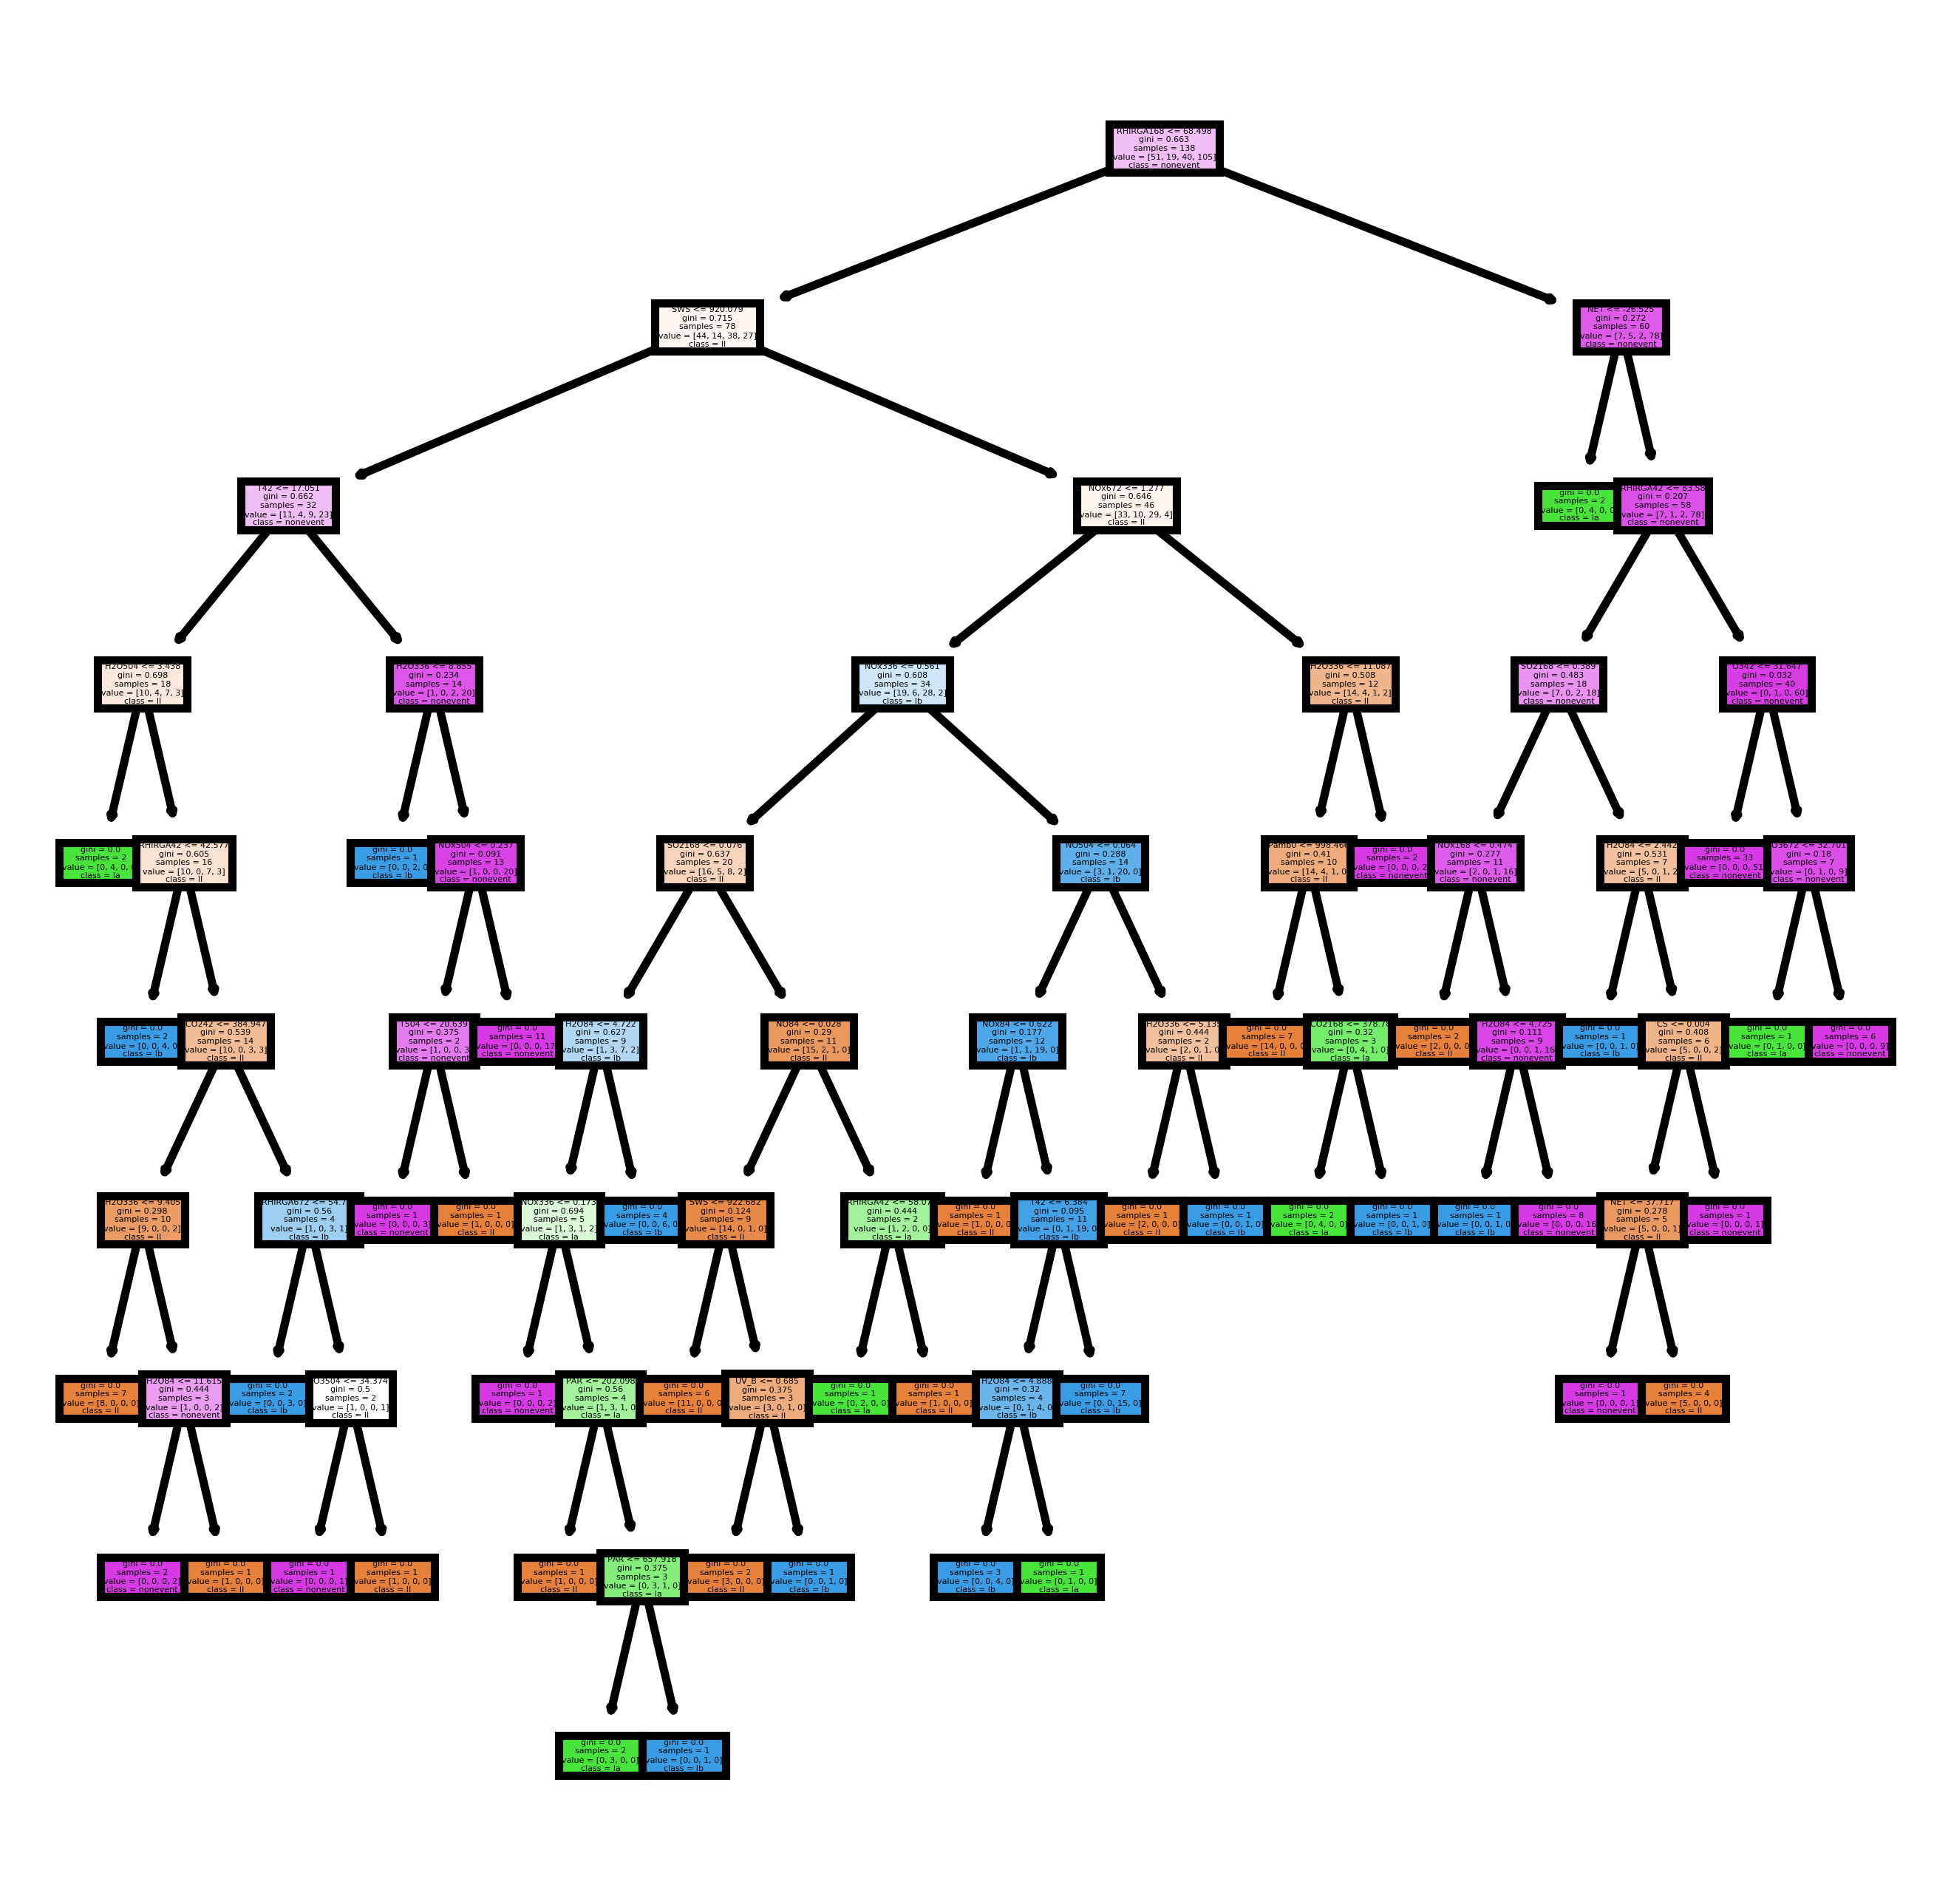

In [38]:
from sklearn import tree

cn=['II', 'Ia', 'Ib', 'nonevent']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf_all_features.estimators_[0],
               feature_names = feature_names, 
               class_names=cn,
               filled = True)
plt.show()

In [39]:
fig.savefig('npf_rf_1.png')

The details are quite small, but by zooming the tree gives some insights. The root has 138 samples, resulting from the default setting that uses bootstrapping and only a subset of the samples. The first split is made by RHINGA168 <= 68.498 At root the classification is nonevent, which seems logical as it is the biggest class. Gini is used to calculate node purity. The colors represent different classes: 

pink: nonevent, 
white: class II, 
green: class Ia, 
blue: class Ib, 
orange: class II

The darker the color, the more pure the classification. Nonevents seem to be on the sides, and events on the middle. Let's plot more small trees to see some variation.

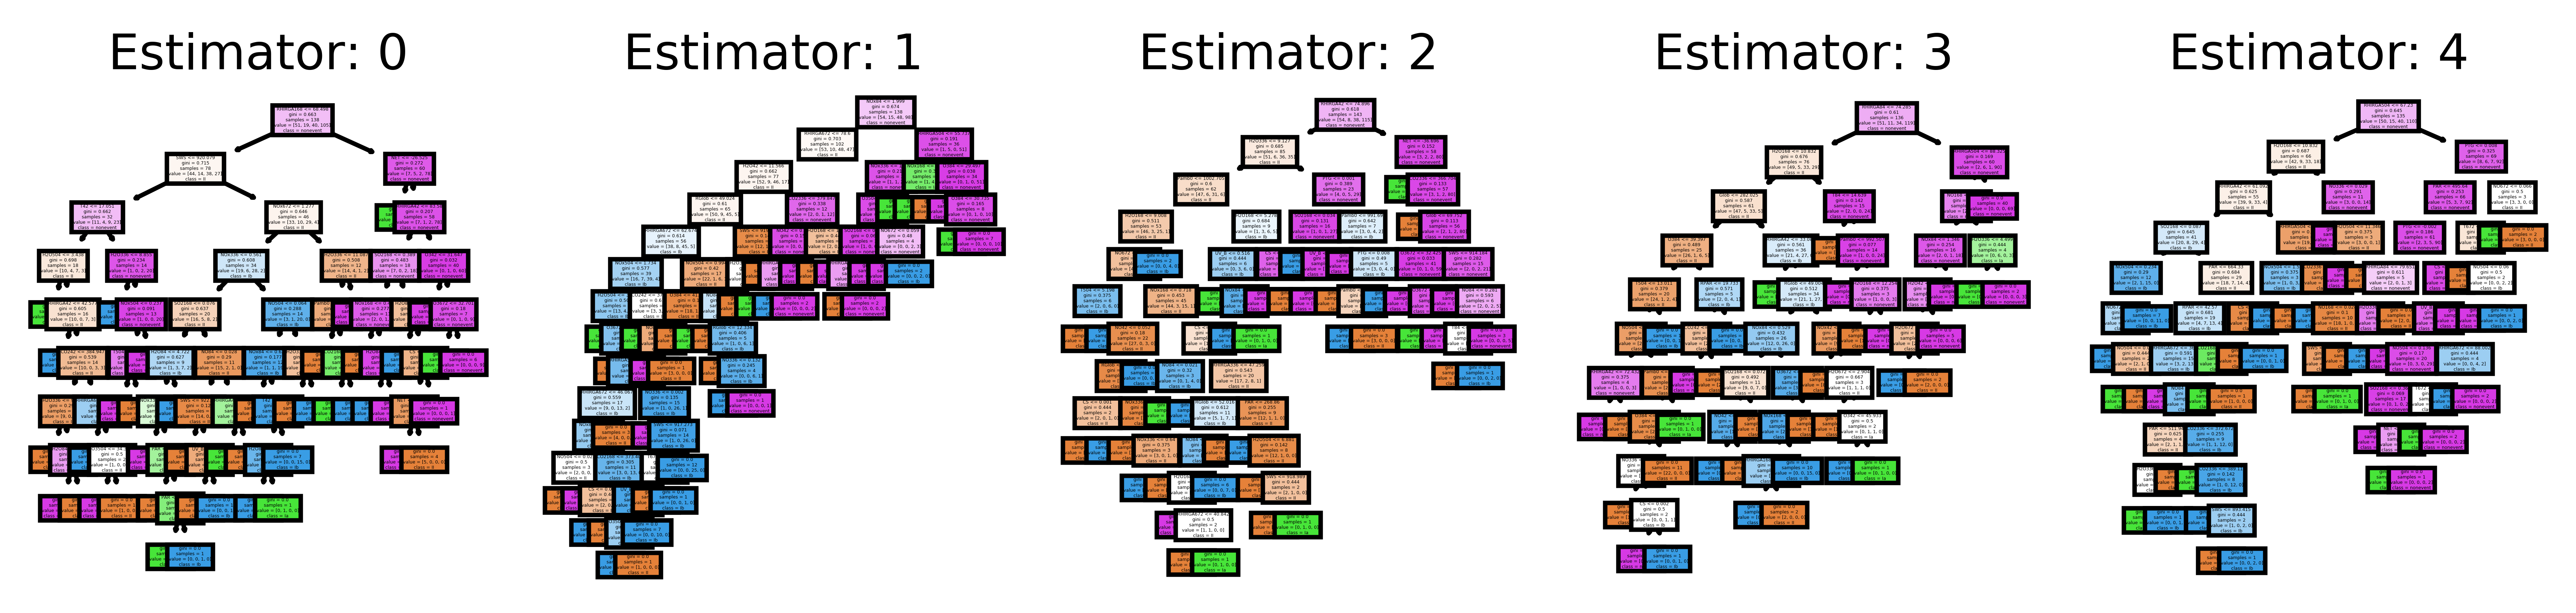

In [40]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(clf_all_features.estimators_[index],
                   feature_names = feature_names, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('npf_rf_5trees_1.png')

The trees seem to vary quite a bit, but I guess that is one of the benefits of this model: to get a lot of different results, and then calculate averages.

In all the trees the initial split is done with differrent attributes: different RHINGAs and one by NOx84. The depth of the trees seem to vary between 10 - 15. This maybe could be worth investigating, so that the trees are not overfitted by too complex structure and depth. Overall these trees still look quite ok to me. 

#### Feature importance

Let's then explore the feature importance function that sklearn provides

In [60]:
imp_feat = clf_all_features.feature_importances_
imp_feat_explained =  {feature_names[i]: round(imp_feat[i], 4) for i in range(len(feature_names))} 
imp_feat_explained_sorted =  {k: v for k, v in sorted(imp_feat_explained .items(), 
                                                      key=lambda item: item[1], reverse = True)}
imp_feat_explained_sorted

{'RHIRGA336': 0.0505,
 'RHIRGA672': 0.0462,
 'RHIRGA84': 0.0451,
 'RHIRGA504': 0.0414,
 'RHIRGA42': 0.036,
 'RHIRGA168': 0.0351,
 'RGlob': 0.0326,
 'H2O168': 0.0303,
 'H2O336': 0.0285,
 'UV_A': 0.0283,
 'CS': 0.0277,
 'Glob': 0.0271,
 'SO2168': 0.0244,
 'H2O84': 0.0235,
 'PTG': 0.0229,
 'H2O672': 0.0217,
 'SWS': 0.0205,
 'PAR': 0.0196,
 'Pamb0': 0.0193,
 'H2O42': 0.0192,
 'O342': 0.0189,
 'RPAR': 0.0184,
 'NET': 0.0181,
 'H2O504': 0.0175,
 'NO672': 0.0165,
 'NOx504': 0.0165,
 'NOx84': 0.0165,
 'T42': 0.0165,
 'NOx336': 0.0147,
 'NO84': 0.0146,
 'O3168': 0.0143,
 'T504': 0.014,
 'CO2504': 0.0139,
 'T672': 0.0139,
 'T168': 0.0131,
 'NOx168': 0.0129,
 'CO2168': 0.0127,
 'NO42': 0.012,
 'NO336': 0.0116,
 'NOx672': 0.0111,
 'O384': 0.0108,
 'T84': 0.0106,
 'NOx42': 0.0105,
 'NO504': 0.0104,
 'UV_B': 0.0104,
 'CO2336': 0.0103,
 'CO242': 0.0103,
 'O3504': 0.0102,
 'O3672': 0.0097,
 'NO168': 0.0093}

The Rhinga features seem to be most prominent in the importance list, which is reflected in the tree plots as well, as Rhinga was ofthen the first split variable. 


### Random Forest and PCA

Let's then do the fitting of PCA on training set with different amounts of components and make models with them, and calculate and lot accuracies.

In [74]:
from sklearn.decomposition import PCA

rf_pca_scores = []
n_components = list(range(1, 51))
no_pca_y_rf =[0.71]*50

for i in n_components:
    pca = PCA(n_components=i).fit(scale(X_train))
    train_transf = pca.transform(scale(X_train))
    valid_transf = pca.transform(scale(X_validate))
    clf = RandomForestClassifier(random_state=0).fit(train_transf, y_train)
    pred = clf.predict(valid_transf)
    score = accuracy_score(y_validate, pred)
    rf_pca_scores.append(score)

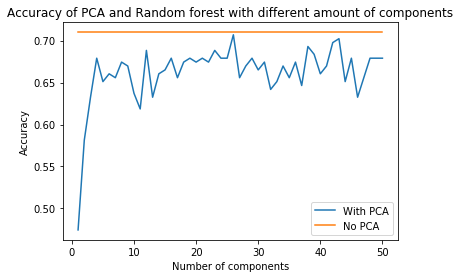

In [76]:
plt.plot(np.arange(1,51), rf_pca_scores, label="With PCA")
plt.plot(np.arange(1,51), no_pca_y_rf, label="No PCA")
plt.title('Accuracy of PCA and Random forest with different amount of components')
plt.ylabel('Accuracy')
plt.xlabel('Number of components')
plt.legend(loc='best', shadow=False, scatterpoints=1)

In [77]:
rf_pca_scores_rounded = [round(score, 2) for score in rf_pca_scores]
print('Scores:', rf_pca_scores_rounded)
print('Min:', min(rf_pca_scores_rounded))
print('Max:', max(rf_pca_scores_rounded))

Scores: [0.47, 0.58, 0.63, 0.68, 0.65, 0.66, 0.66, 0.67, 0.67, 0.64, 0.62, 0.69, 0.63, 0.66, 0.67, 0.68, 0.66, 0.67, 0.68, 0.67, 0.68, 0.67, 0.69, 0.68, 0.68, 0.71, 0.66, 0.67, 0.68, 0.67, 0.67, 0.64, 0.65, 0.67, 0.66, 0.67, 0.65, 0.69, 0.68, 0.66, 0.67, 0.7, 0.7, 0.65, 0.68, 0.63, 0.66, 0.68, 0.68, 0.68]
Min: 0.47
Max: 0.71


It seems that under 5 components is clearly too little, but for 6 or more components the results seem to vary between 62 - 71 % accuracy. The best results seem to be around 15- 25 components. So PCA does not seem to improve the results of Random Forest.

### Adjusting the amount of trees in the Random Forest

Let's try different tree amounts. The default is 100 trees.

In [32]:
n_trees = [1, 5, 10, 25, 50, 100, 150, 200]
rf_tree_scores = []

for i in n_trees:
    clf_all_features_ntree = RandomForestClassifier(n_estimators=i, random_state=0).fit(X_train, y_train)
    pred_ntree = clf_all_features_ntree.predict(X_validate)
    score_tree = accuracy_score(y_validate, pred_ntree)
    rf_tree_scores.append(score_tree)

In [33]:
rf_tree_scores

[0.5534883720930233,
 0.641860465116279,
 0.627906976744186,
 0.6883720930232559,
 0.6837209302325581,
 0.7116279069767442,
 0.7209302325581395,
 0.7116279069767442]

Text(0.5, 0, 'Number of trees')

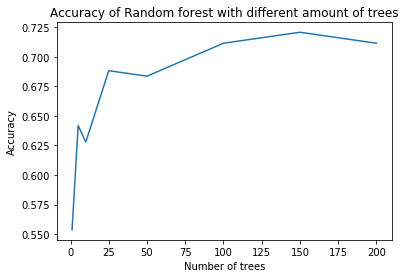

In [34]:
plt.plot(n_trees, rf_tree_scores)
plt.title('Accuracy of Random forest with different amount of trees')
plt.ylabel('Accuracy')
plt.xlabel('Number of trees')

It seems the default 100 trees works quite well for this data, but it might be good to try bigger tree amounts with cross validation

### Testing binary classification with Random Forest

Let's now investigate the binary classification with probabilities.

In [29]:
binary_target = npf['class2'] 
binary_target

rownames
2000-02-23    nonevent
2000-03-25       event
2000-04-06       event
2000-04-11    nonevent
2000-04-23       event
                ...   
2004-01-31    nonevent
2008-08-20    nonevent
2009-04-22       event
2006-12-12    nonevent
2009-11-19    nonevent
Name: class2, Length: 430, dtype: object

In [42]:
binary_target.shape

(430,)

In [31]:
X_train_bin, X_validate_bin, y_train_bin, y_validate_bin = train_test_split(mean_X, npf['class2'], test_size=0.50, random_state=0)
clf_all_features_bin = RandomForestClassifier(random_state=0).fit(X_train_bin, y_train_bin)
pred_class_all_feat_bin = clf_all_features_bin.predict(X_validate_bin)
print('Random forest binary prediction with defaults and all features gives accuracy score:',
    round(accuracy_score(y_validate_bin,pred_class_all_feat_bin), 2))

Random forest binary prediction with defaults and all features gives accuracy score: 0.87


The accuracy seems to jump up a bit to 87% when the classification is only binary. What about predicting the probabilities?

In [32]:
pred_bin_prob = clf_all_features_bin.predict_proba(X_validate_bin)
#pred_bin_prob # gives event - noevent probabilities, shape (215, 2)

In [33]:
bin_prob_event = pred_bin_prob[:,0] # probabilities of events

bin_prob_event

array([0.62, 0.96, 0.99, 0.5 , 0.24, 0.61, 0.25, 0.82, 0.09, 0.  , 0.14,
       0.92, 0.41, 0.97, 0.08, 0.39, 0.79, 0.03, 0.01, 0.77, 0.45, 0.99,
       0.83, 0.98, 0.75, 0.01, 0.94, 0.33, 0.27, 1.  , 0.11, 0.62, 0.99,
       0.85, 0.58, 0.35, 0.08, 0.05, 0.21, 0.03, 0.98, 0.43, 0.89, 0.39,
       0.31, 0.42, 0.17, 0.75, 0.48, 0.04, 0.99, 0.17, 0.97, 0.79, 0.69,
       0.29, 0.84, 0.31, 0.9 , 0.19, 0.11, 0.97, 0.92, 0.22, 0.95, 0.07,
       0.18, 0.29, 0.01, 0.78, 0.13, 0.55, 0.1 , 0.28, 0.04, 0.21, 0.97,
       1.  , 0.86, 0.4 , 0.99, 0.47, 0.11, 0.93, 0.15, 0.17, 0.1 , 0.7 ,
       0.99, 0.  , 0.15, 0.  , 0.76, 0.15, 0.88, 0.02, 0.03, 0.3 , 0.13,
       0.43, 0.92, 0.16, 0.92, 0.92, 0.94, 0.09, 0.63, 0.36, 0.16, 0.08,
       1.  , 0.63, 0.51, 0.99, 0.19, 0.09, 0.22, 0.91, 0.  , 0.57, 0.24,
       0.13, 0.05, 0.99, 0.24, 0.22, 0.98, 0.39, 0.98, 0.98, 0.12, 0.91,
       0.24, 0.1 , 0.14, 0.39, 0.26, 0.13, 0.23, 0.5 , 0.03, 0.76, 0.49,
       0.31, 0.99, 0.06, 0.21, 0.92, 0.23, 0.97, 0.

Let's try the binary with decision tree

In [159]:
dtc_50means_binary = DecisionTreeClassifier(random_state=0).fit(X_train_bin, y_train_bin)
pred_class_50mean_binary = dtc_50means_binary.predict(X_validate_bin)

print('Decision tree binary prediction with defaults and 59 means gives accuracy score:',
          round(accuracy_score(y_validate_bin, pred_class_50mean_binary), 2))


Decision tree binary prediction with defaults and 59 means gives accuracy score: 0.8


### Testing adding month variable

I want to explore the random forest solution further, and make more educated choises of the parameters for the algorithm. First however, I want to research making a new variable from the month. Let's then make a new split and test decision trees and random forest again.

In [84]:
npf['month'] = pd.DatetimeIndex(npf['date']).month
mean_X_months = mean_X.join(npf['month'])
mean_X_months
X_train_m, X_validate_m, y_train_m, y_validate_m = train_test_split(mean_X_months, npf['class4'], test_size=0.50, random_state=0)

In [85]:
clf_month_dtc = DecisionTreeClassifier(random_state=0).fit(X_train_m, y_train_m)
pred_month_dtc = clf_month_dtc.predict(X_validate_m)

print('Decision tree prediction with defaults and all features gives accuracy score:',
          round(accuracy_score(y_validate_m, pred_month_dtc), 2))


Decision tree prediction with defaults and all features gives accuracy score: 0.63


In [87]:
clf_month_rf = RandomForestClassifier(random_state=0).fit(X_train_m, y_train_m)
pred_month_rf = clf_month_rf.predict(X_validate_m)
print('Random forest prediction with defaults and all features gives accuracy score:',
    round(accuracy_score(y_validate_m, pred_month_rf), 2))

Random forest prediction with defaults and all features gives accuracy score: 0.69


### Testing with cross-validation with month variable

The result's with just one model seem a bit random, so let's next try comparing the results of set with month and without month with cross validation for both decision trees and random forest.

Let's shuffle and divide the existing train data into two to make them train and validation data, and use the existing validation data to do testing (old division: X_train, X_validate, y_train, y_validate, 50% both)

In [100]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

dtc_accuracy_cv = []
dtc_accuracy_test = []

for train_index, valid_index in kf.split(X_train):
    cross_train_X, cross_valid_X = X_train.iloc[train_index], X_train.iloc[valid_index]
    cross_train_y, cross_valid_y = y_train.iloc[train_index], y_train.iloc[valid_index]
    
    dtc =  DecisionTreeClassifier(random_state=0).fit(cross_train_X, cross_train_y)
    pred_valid_dtc = dtc.predict(cross_valid_X)
    acc_valid_dtc = accuracy_score(cross_valid_y,pred_valid_dtc)
    
    pred_test_dtc = dtc.predict(X_validate)
    acc_test_dtc = accuracy_score(y_validate,pred_test_dtc)
    
    dtc_accuracy_cv.append(acc_valid_dtc)
    dtc_accuracy_test.append(acc_test_dtc)
    

cross_valid_av = sum(dtc_accuracy_cv)/len(dtc_accuracy_cv)
test_av = sum(dtc_accuracy_test)/len(dtc_accuracy_test)
print('Decision tree cross validation: \n' +
      'Average accuracy with cross validation set: %.2f' % cross_valid_av +'\n' +
      'Average accuracy with test set: %.2f' % test_av
     )

Decision tree cross validation: 
Average accuracy with cross validation set: 0.58
Average accuracy with test set: 0.60


Let's do the same with month added

In [103]:
kf = KFold(n_splits=10)

dtc_accuracy_cv_m = []
dtc_accuracy_test_m = []

for train_index, valid_index in kf.split(X_train_m):
    cross_train_X, cross_valid_X = X_train_m.iloc[train_index], X_train_m.iloc[valid_index]
    cross_train_y, cross_valid_y = y_train_m.iloc[train_index], y_train_m.iloc[valid_index]
    
    dtc_m =  DecisionTreeClassifier(random_state=0).fit(cross_train_X, cross_train_y)
    pred_valid_dtc = dtc_m.predict(cross_valid_X)
    acc_valid_dtc = accuracy_score(cross_valid_y,pred_valid_dtc)
    
    pred_test_dtc = dtc.predict(X_validate)
    acc_test_dtc = accuracy_score(y_validate,pred_test_dtc)
    
    dtc_accuracy_cv_m.append(acc_valid_dtc)
    dtc_accuracy_test_m.append(acc_test_dtc)
    

cross_valid_av_m = sum(dtc_accuracy_cv_m)/len(dtc_accuracy_cv_m)
test_av_m = sum(dtc_accuracy_test_m)/len(dtc_accuracy_test_m)
print('Decision tree cross validation: \n' +
      'Average accuracy with cross validation set: %.2f' % cross_valid_av_m +'\n' +
      'Average accuracy with test set: %.2f' % test_av_m
     )

Decision tree cross validation: 
Average accuracy with cross validation set: 0.62
Average accuracy with test set: 0.63


Adding the month really seem to improve the results: with decision tree the accuracy improvement was 3-4 %. Let's do the same comparison with random forest.

In [105]:
rf_accuracy_cv = []
rf_accuracy_test = []

for train_index, valid_index in kf.split(X_train):
    cross_train_X, cross_valid_X = X_train.iloc[train_index], X_train.iloc[valid_index]
    cross_train_y, cross_valid_y = y_train.iloc[train_index], y_train.iloc[valid_index]
    
    rf =  RandomForestClassifier(random_state=0).fit(cross_train_X, cross_train_y)
    pred_valid_rf = rf.predict(cross_valid_X)
    acc_valid_rf = accuracy_score(cross_valid_y,pred_valid_rf)
    
    pred_test_rf = dtc.predict(X_validate)
    acc_test_rf = accuracy_score(y_validate,pred_test_rf)
    
    rf_accuracy_cv.append(acc_valid_rf)
    rf_accuracy_test.append(acc_test_rf)
    

cross_valid_av_rf = sum(rf_accuracy_cv)/len(rf_accuracy_cv)
test_av_rf = sum(rf_accuracy_test)/len(rf_accuracy_test)
print('Random forest cross validation: \n' +
      'Average accuracy with cross validation set: %.2f' % cross_valid_av_rf+'\n' +
      'Average accuracy with test set: %.2f' % test_av_rf
     )

Random forest cross validation: 
Average accuracy with cross validation set: 0.64
Average accuracy with test set: 0.63


In [107]:
rf_accuracy_cv_m = []
rf_accuracy_test_m = []

for train_index, valid_index in kf.split(X_train_m):
    cross_train_X, cross_valid_X = X_train_m.iloc[train_index], X_train_m.iloc[valid_index]
    cross_train_y, cross_valid_y = y_train_m.iloc[train_index], y_train_m.iloc[valid_index]
    
    rf_m =  RandomForestClassifier(random_state=0).fit(cross_train_X, cross_train_y)
    pred_valid_rf = rf_m.predict(cross_valid_X)
    acc_valid_rf = accuracy_score(cross_valid_y,pred_valid_rf)
    
    pred_test_rf = dtc.predict(X_validate)
    acc_test_rf = accuracy_score(y_validate,pred_test_rf)
    
    rf_accuracy_cv_m.append(acc_valid_rf)
    rf_accuracy_test_m.append(acc_test_rf)
    

cross_valid_av_rf_m = sum(rf_accuracy_cv_m)/len(rf_accuracy_cv_m)
test_av_rf_m = sum(rf_accuracy_test_m)/len(rf_accuracy_test_m)
print('Random forest cross validation: \n' +
      'Average accuracy with cross validation set: %.2f' % cross_valid_av_rf_m+'\n' +
      'Average accuracy with test set: %.2f' % test_av_rf_m
     )

Random forest cross validation: 
Average accuracy with cross validation set: 0.65
Average accuracy with test set: 0.63


The adding of month seems to make the decision tree better, but the random forest not so much. I wonder if the training data is too little for random forest in this cross validation setting? Let's run the thing again with whole data, now only validating with cross validation

In [112]:
rf_accuracy_cv_all = []

for train_index, valid_index in kf.split(mean_X):
    cross_train_X, cross_valid_X = mean_X.iloc[train_index], mean_X.iloc[valid_index]
    cross_train_y, cross_valid_y = npf['class4'].iloc[train_index], npf['class4'].iloc[valid_index]
    
    rf_all=  RandomForestClassifier(random_state=0).fit(cross_train_X, cross_train_y)
    pred_valid_rf = rf_all.predict(cross_valid_X)
    acc_valid_rf = accuracy_score(cross_valid_y,pred_valid_rf)
    
    rf_accuracy_cv_all.append(acc_valid_rf)

cross_valid_av_rf_all = sum(rf_accuracy_cv_all)/len(rf_accuracy_cv_all)

print('Random forest cross validation: \n' +
      'Average accuracy with cross validation set: %.2f' % cross_valid_av_rf_all
     )

Random forest cross validation: 
Average accuracy with cross validation set: 0.68


In [111]:
rf_accuracy_cv_all_m = []

for train_index, valid_index in kf.split(mean_X_months):
    cross_train_X, cross_valid_X = mean_X_months.iloc[train_index], mean_X_months.iloc[valid_index]
    cross_train_y, cross_valid_y = npf['class4'].iloc[train_index], npf['class4'].iloc[valid_index]
    
    rf_all_m =  RandomForestClassifier(random_state=0).fit(cross_train_X, cross_train_y)
    pred_valid_rf = rf_all_m.predict(cross_valid_X)
    acc_valid_rf = accuracy_score(cross_valid_y,pred_valid_rf)
    
    rf_accuracy_cv_all_m.append(acc_valid_rf)

    
cross_valid_av_rf_all_m = sum(rf_accuracy_cv_all_m)/len(rf_accuracy_cv_all_m)

print('Random forest cross validation: \n' +
      'Average accuracy with cross validation set: %.2f' % cross_valid_av_rf_all_m
     )

Random forest cross validation: 
Average accuracy with cross validation set: 0.68


Using all data seems to help a bit, but month does not seem to make much difference in random forest classification. Let's try next the effect with binary classification.

In [113]:
X_train_bin_m, X_validate_bin_m, y_train_bin_m, y_validate_bin_m = train_test_split(mean_X_months, npf['class2'], test_size=0.50, random_state=0)

In [119]:
rf_accuracy_cv_bin_m = []
rf_accuracy_test_bin_m = []

for train_index, valid_index in kf.split(X_train_bin_m):
    cross_train_X, cross_valid_X = X_train_bin_m.iloc[train_index], X_train_bin_m.iloc[valid_index]
    cross_train_y, cross_valid_y =  y_train_bin_m.iloc[train_index],  y_train_bin_m.iloc[valid_index]
    
    rf_bin_m =  RandomForestClassifier(random_state=0).fit(cross_train_X, cross_train_y)
    pred_valid_rf_bin_m = rf_bin_m.predict(cross_valid_X)
    acc_valid_rf_bin_m = accuracy_score(cross_valid_y,pred_valid_rf_bin_m)
    
    pred_test_rf_bin_m = rf_bin_m.predict(X_validate_m)
    acc_test_rf_bin_m = accuracy_score(y_validate_bin_m,pred_test_rf_bin_m)
    
    rf_accuracy_cv_bin_m.append(acc_valid_rf_bin_m)
    rf_accuracy_test_bin_m.append(acc_test_rf_bin_m)

    
cross_valid_av_rf_bin_m = sum(rf_accuracy_cv_bin_m)/len(rf_accuracy_cv_bin_m)
test_av_rf_bin_m = sum(rf_accuracy_test_bin_m)/len(rf_accuracy_test_bin_m)

print('Random forest cross validation for binary classification: \n' +
      'Average accuracy with cross validation set: %.2f' % cross_valid_av_rf_bin_m+'\n' +
      'Average accuracy with test set: %.2f' % test_av_rf_bin_m
     )

Random forest cross validation for binary classification: 
Average accuracy with cross validation set: 0.89
Average accuracy with test set: 0.86


Again, binary prediction looks about the same, but I guess 86 % is ok result for test set.

Let's do this binary test again withot month.

In [161]:
rf_accuracy_cv_bin = []
rf_accuracy_test_bin = []

for train_index, valid_index in kf.split(X_train_bin):
    cross_train_X, cross_valid_X = X_train_bin.iloc[train_index], X_train_bin.iloc[valid_index]
    cross_train_y, cross_valid_y =  y_train_bin.iloc[train_index],  y_train_bin.iloc[valid_index]
    
    rf_bin =  RandomForestClassifier(random_state=0).fit(cross_train_X, cross_train_y)
    pred_valid_rf_bin = rf_bin.predict(cross_valid_X)
    acc_valid_rf_bin = accuracy_score(cross_valid_y,pred_valid_rf_bin)
    
    pred_test_rf_bin = rf_bin.predict(X_validate_bin)
    acc_test_rf_bin = accuracy_score(y_validate_bin,pred_test_rf_bin)
    
    rf_accuracy_cv_bin.append(acc_valid_rf_bin)
    rf_accuracy_test_bin.append(acc_test_rf_bin)

    
cross_valid_av_rf_bin = sum(rf_accuracy_cv_bin)/len(rf_accuracy_cv_bin)
test_av_rf_bin = sum(rf_accuracy_test_bin)/len(rf_accuracy_test_bin)

print('Random forest cross validation for binary classification: \n' +
      'Average accuracy with cross validation set: %.3f' % cross_valid_av_rf_bin+'\n' +
      'Average accuracy with test set: %.3f' % test_av_rf_bin
     )

Random forest cross validation for binary classification: 
Average accuracy with cross validation set: 0.879
Average accuracy with test set: 0.865


Again, binary prediction looks about the same, but I guess 86 % is ok result for test set.

### Testing bootstrap sample size

Let's next explore how subset sample size changes the results. Let's combine this with cross-validation, to see possible overfitting effects. The default for this parameter is None, all samples will be used from the bootstrapped sample.

In [162]:
rf_accuracy_cv_sample = []
rf_accuracy_test_sample = []

plot_cv = []
plot_test = []
models = []

max_samples = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
for sample in max_samples:
    for train_index, valid_index in kf.split(X_train):
        cross_train_X, cross_valid_X = X_train.iloc[train_index], X_train.iloc[valid_index]
        cross_train_y, cross_valid_y =  y_train.iloc[train_index],  y_train.iloc[valid_index]

        rf_sample_m =  RandomForestClassifier(random_state=0, max_samples = sample).fit(cross_train_X, cross_train_y)
        pred_valid_sample_m = rf_sample_m.predict(cross_valid_X)
        acc_valid_rf_sample_m = accuracy_score(cross_valid_y, pred_valid_sample_m)

        pred_test_rf_sample_m = rf_sample_m.predict(X_validate)
        acc_test_rf_sample_m = accuracy_score(y_validate,pred_test_rf_sample_m)

        rf_accuracy_cv_sample.append(acc_valid_rf_sample_m)
        rf_accuracy_test_sample.append(acc_test_rf_sample_m)

        cross_valid_av_rf_sample = sum(rf_accuracy_cv_sample)/len(rf_accuracy_cv_sample)
        test_av_rf_sample = sum(rf_accuracy_test_sample)/len(rf_accuracy_test_sample)
        if len(rf_accuracy_test_sample) == 10:
            print(rf_accuracy_cv_sample)
            print(rf_accuracy_test_sample)
            print('Random forest cross validation with subset of size:' + str(sample) + ' \n'+ 
                  'Average accuracy with cross validation set: %.2f' % cross_valid_av_rf_sample+'\n' +
                  'Average accuracy with test set: %.2f' % test_av_rf_sample
                 )
            plot_cv.append(cross_valid_av_rf_sample)
            plot_test.append(test_av_rf_sample)
            models.append(rf_sample_m)
            rf_accuracy_cv_sample = []
            rf_accuracy_test_sample = []
            
            #cn=['II', 'Ia', 'Ib', 'nonevent']
            #fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
            #tree.plot_tree(rf_sample_m.estimators_[0],
            #   feature_names = feature_names, 
            #   class_names=cn,
            #   filled = True)
            #plt.show()
            #fig.savefig(str(sample)+'npf_rf_5trees_sample_nomonth.png')


[0.5909090909090909, 0.8636363636363636, 0.3181818181818182, 0.6363636363636364, 0.5909090909090909, 0.5238095238095238, 0.7619047619047619, 0.6666666666666666, 0.6190476190476191, 0.5714285714285714]
[0.6, 0.6372093023255814, 0.6046511627906976, 0.6325581395348837, 0.641860465116279, 0.6325581395348837, 0.627906976744186, 0.6325581395348837, 0.6651162790697674, 0.6465116279069767]
Random forest cross validation with subset of size:0.1 
Average accuracy with cross validation set: 0.61
Average accuracy with test set: 0.63
[0.6363636363636364, 0.8181818181818182, 0.36363636363636365, 0.6818181818181818, 0.6818181818181818, 0.5238095238095238, 0.7619047619047619, 0.6190476190476191, 0.5714285714285714, 0.7142857142857143]
[0.6744186046511628, 0.6790697674418604, 0.6465116279069767, 0.6744186046511628, 0.6837209302325581, 0.6883720930232559, 0.6744186046511628, 0.6651162790697674, 0.6837209302325581, 0.6930232558139535]
Random forest cross validation with subset of size:0.2 
Average accura

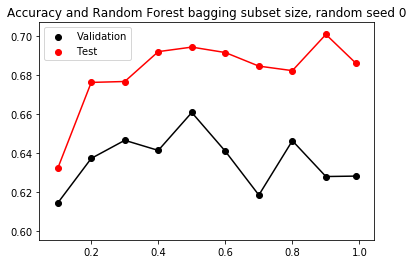

In [155]:
plt.figure()
plt.scatter(max_samples,plot_cv,color="black", label='Validation')
plt.plot(max_samples, plot_cv,color="black")
plt.scatter(max_samples,plot_test ,color="red", label='Test')
plt.plot(max_samples, plot_test,color="red")
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Accuracy and Random Forest bagging subset size, random seed 0')
plt.show()  


There does not seem to be reason to restrict the size of bootstrapped samples further.

### Grouping variables

Next I want to research aggregating the similar columns to their mean values. I will first make means of the features that have several measurements. Then I will take the features that will remain as they are as a base, and add the grouped features to the dataframe. Let's also add month and year as variables.

In [207]:
#feature_names 

In [34]:
co = mean_X[['CO2168','CO2336','CO242','CO2504']].mean(axis=1)
h2o = mean_X[['H2O168', 'H2O336','H2O42','H2O504','H2O672','H2O84']].mean(axis=1)
no = mean_X[[ 'NO168','NO336','NO42','NO504','NO672','NO84']].mean(axis=1)
nox = mean_X[[ 'NOx168','NOx336','NOx42','NOx504','NOx672','NOx84']].mean(axis=1)
o = mean_X[[ 'O3168','O342','O3504','O3672','O384']].mean(axis=1)
rhinga = mean_X[['RHIRGA168','RHIRGA336','RHIRGA42','RHIRGA504','RHIRGA672','RHIRGA84']].mean(axis=1)
t = mean_X[['T168','T42','T504','T672','T84']].mean(axis=1)

In [46]:
mean_X_grouped = mean_X[['Glob', 'NET', 'Pamb0','PAR','PTG','RGlob', 'RPAR','SO2168','SWS','UV_A', 'UV_B', 'CS']]
mean_X_grouped = mean_X_grouped.assign(CO = co.values)
mean_X_grouped =mean_X_grouped.assign(H2O = h2o.values)
mean_X_grouped =mean_X_grouped.assign(NO = no.values)
mean_X_grouped =mean_X_grouped.assign(NOX = nox.values)
mean_X_grouped =mean_X_grouped.assign(O = o.values)
mean_X_grouped =mean_X_grouped.assign(RHINGA = rhinga.values)
mean_X_grouped =mean_X_grouped.assign(T = t.values)

In [38]:
#npf['year'] = pd.DatetimeIndex(npf['date']).year
#mean_X_grouped = mean_X_grouped.join(npf['month'])
#mean_X_grouped['year']  = mean_X_grouped.join(npf['year'])
#mean_X_grouped 

# lets not use month as it is not in the test data

Let's use this new 19 column data with decision trees and random forest, and compare the results.

In [48]:
X_train_grouped, X_validate_grouped, y_train_grouped, y_validate_grouped = train_test_split(mean_X_grouped, npf['class4'], test_size=0.50, random_state=0)
X_train_grouped

Glob         NET        Pamb0         PAR       PTG  \
rownames                                                                
2008-07-01  231.640128  160.561691   992.567457  492.350154  0.002997   
2009-01-29   28.151403    5.098462  1001.230452   61.718190  0.001516   
2003-05-17   76.979597   59.222278   987.470609  168.447760 -0.000431   
2000-04-06  269.981547  156.409709   986.740455  515.622611 -0.002910   
2010-12-23   40.557764    5.624633  1001.198818   63.200383  0.102907   
...                ...         ...          ...         ...       ...   
2008-04-24  333.494017  227.983117   996.072848  660.237598 -0.001807   
2010-06-26  307.613039  173.876370   987.377946  639.274567 -0.004278   
2007-04-13  245.015206  172.210662  1000.377638  478.206135 -0.005367   
2004-03-19  269.029945  187.071046   987.595761  521.483100  0.016475   
2009-08-07  278.850649  201.608260  1005.116102  592.750678  0.005898   

                RGlob       RPAR    SO2168         SWS       UV_A      UV_B  \
rownames                                                                      
2008-07-01  27.498019  15.485771  0.263897  912.615385  14.959513  0.725205   
2009-01-29   9.418371  14.312172  0.098919  918.500000   2.266292  0.045384   
2003-05-17   9.045061   8.975829  0.046045  852.084507   5.670896  0.185977   
2000-04-06  41.006814  32.940216  0.107066  923.410714  14.286261  0.418313   
2010-12-23  17.917444  24.714888  0.814808  906.600000   2.022757  0.049353   
...               ...        ...       ...         ...        ...       ...   
2008-04-24  42.768629  22.872030  0.154204  922.693548  17.549097  0.717369   
2010-06-26  38.810212  20.572428  0.135510  884.525641  18.369364  0.820255   
2007-04-13  25.617156  16.611135  0.061986  923.706897  13.424703  0.614778   
2004-03-19  49.232675  39.408519  0.366803  931.183673  13.533369  0.346622   
2009-08-07  34.023643  17.615713  0.068263  918.626866  16.843295  0.856226   

                  CS          CO        H2O        NO       NOX          O  \
rownames                                                                     
2008-07-01  0.004613  380.386751  11.828614  0.028123  0.558321  37.323187   
2009-01-29  0.002705  404.363037   4.311157  0.130193  2.305735  19.400416   
2003-05-17  0.002689  377.272772  10.820028  0.014076  0.985372  32.783258   
2000-04-06  0.000541  372.412545   4.443263  0.028892  0.740848  45.949629   
2010-12-23  0.003046  408.551277   0.969945  0.440108  4.566213  19.409912   
...              ...         ...        ...       ...       ...        ...   
2008-04-24  0.002045  387.417876   3.880435  0.013138  0.414618  48.440767   
2010-06-26  0.005657  386.566504  11.426356  0.050976  0.527413  31.152267   
2007-04-13  0.001663  387.034746   5.508723  0.070954  0.646716  42.216974   
2004-03-19  0.002853  382.836374   5.282488  0.320999  2.434650  37.524823   
2009-08-07  0.003909  376.903982  12.450095  0.005013  0.134509  29.197647   

               RHINGA          T  
rownames                          
2008-07-01  62.382556  16.852908  
2009-01-29  95.232858  -3.998914  
2003-05-17  98.719374   8.097783  
2000-04-06  65.460978   1.551480  
2010-12-23  96.132158 -22.446760  
...               ...        ...  
2008-04-24  37.039436   8.126378  
2010-06-26  65.685628  15.448759  
2007-04-13  52.827432   7.981264  
2004-03-19  58.268231   5.762123  
2009-08-07  54.637666  19.818537  

[215 rows x 19 columns]

In [172]:
dtc_grouped = DecisionTreeClassifier(random_state=0).fit(X_train_grouped, y_train_grouped)
pred_grouped_dtc = dtc_grouped.predict(X_validate_grouped)

print('Decision tree prediction with defaults and grouped features gives accuracy score:',
          round(accuracy_score(y_validate_grouped, pred_grouped_dtc), 2))


Decision tree prediction with defaults and grouped features gives accuracy score: 0.63


In [173]:
rf_grouped = RandomForestClassifier(random_state=0).fit(X_train_grouped, y_train_grouped)
pred_grouped_rf = rf_grouped.predict(X_validate_grouped)
print('Random forest prediction with defaults and grouped features gives accuracy score:',
    round(accuracy_score(y_validate_grouped, pred_grouped_rf), 2))

Random forest prediction with defaults and grouped features gives accuracy score: 0.69


The results seem to be about the same as with when the month variable was added, so maybe reducing variables is not necessary. Let's still do a cross validation

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

rf_accuracy_valid_group = []
rf_accuracy_test_group = []

dt_accuracy_valid_group = []
dt_accuracy_test_group = []

for train_index, valid_index in kf.split(X_train_grouped):
    cross_train_X, cross_valid_X = X_train_grouped.iloc[train_index],X_train_grouped.iloc[valid_index]
    cross_train_y, cross_valid_y =  y_train_grouped.iloc[train_index], y_train_grouped.iloc[valid_index]

    # RF
    rf_group =  RandomForestClassifier(random_state=0).fit(cross_train_X, cross_train_y)
    pred_valid_rf_group = rf_group.predict(cross_valid_X)
    acc_valid_rf_group = accuracy_score(cross_valid_y,pred_valid_rf_group)
    
    pred_test_rf_group = rf_group.predict(X_validate_grouped)
    acc_test_rf_group = accuracy_score(y_validate_grouped,pred_test_rf_group)
    
    rf_accuracy_valid_group.append(acc_valid_rf_group)
    rf_accuracy_test_group.append(acc_test_rf_group)
    
    ## DT
    dtc_group =  DecisionTreeClassifier(random_state=0).fit(cross_train_X, cross_train_y)
    pred_valid_dtc = dtc_group.predict(cross_valid_X)
    acc_valid_dtc = accuracy_score(cross_valid_y,pred_valid_dtc)
    
    pred_test_dtc = dtc_group.predict(X_validate_grouped)
    acc_test_dtc = accuracy_score(y_validate_grouped,pred_test_dtc)
    
    dt_accuracy_valid_group.append(acc_valid_dtc)
    dt_accuracy_test_group.append(acc_test_dtc)
    
    
cross_valid_av_rf_group = sum(rf_accuracy_valid_group)/len(rf_accuracy_valid_group)
test_av_rf_group = sum(rf_accuracy_test_group)/len(rf_accuracy_test_group)

cross_valid_av_dt_group = sum(dt_accuracy_valid_group)/len(dt_accuracy_valid_group)
test_av_dt_group = sum(dt_accuracy_test_group)/len(dt_accuracy_test_group)


print('Random forest cross validation for grouped feature classification: \n' +
      'Average accuracy with cross validation set: %.2f' % cross_valid_av_rf_group  +'\n' +
      'Average accuracy with test set: %.2f' % test_av_rf_group
     )
    
print('Decision tree cross validation for grouped feature classification: \n' +
      'Average accuracy with cross validation set: %.2f' % cross_valid_av_dt_group+'\n' +
      'Average accuracy with test set: %.2f' % test_av_dt_group 
     )    

Random forest cross validation for grouped feature classification: 
Average accuracy with cross validation set: 0.65
Average accuracy with test set: 0.68
Decision tree cross validation for grouped feature classification: 
Average accuracy with cross validation set: 0.61
Average accuracy with test set: 0.61


### Tree amount test with cross validation

Let's next try cross-validation and tree amount with random forest with the reduced features data. 

In [176]:
rf_accuracy_cv_tree_grouped = []
rf_accuracy_test_tree_grouped = []

tree_amount = [70, 80, 100, 120, 140, 160]

for trees in tree_amount:
    for train_index, valid_index in kf.split(X_train_grouped):
        cross_train_X, cross_valid_X = X_train_grouped.iloc[train_index], X_train_grouped.iloc[valid_index]
        cross_train_y, cross_valid_y =  y_train_grouped.iloc[train_index],  y_train_grouped.iloc[valid_index]

        rf_grouped =  RandomForestClassifier(random_state=0, n_estimators=trees).fit(cross_train_X, cross_train_y)
        pred_valid_grouped = rf_grouped.predict(cross_valid_X)
        acc_valid_rf_grouped = accuracy_score(cross_valid_y, pred_valid_grouped)

        pred_test_grouped = rf_grouped.predict(X_validate_grouped)
        acc_test_rf_grouped = accuracy_score(y_validate_grouped,pred_test_grouped)

        rf_accuracy_cv_tree_grouped.append(acc_valid_rf_grouped )
        rf_accuracy_test_tree_grouped.append(acc_test_rf_grouped)


        if len(rf_accuracy_test_tree_grouped) == 10:
            
            cross_valid_av_grouped = sum(rf_accuracy_cv_tree_grouped)/len(rf_accuracy_cv_tree_grouped)
            test_av_grouped = sum(rf_accuracy_test_tree_grouped )/len(rf_accuracy_test_tree_grouped)
            print('Random forest cross validation with tree amount:' + str(trees) + ' \n'+ 
                  'Average accuracy with cross validation set: %.2f' % cross_valid_av_grouped+'\n' +
                  'Average accuracy with test set: %.2f' % test_av_grouped 
                 )
            rf_accuracy_cv_tree_grouped = []
            rf_accuracy_test_tree_grouped = []
   

Random forest cross validation with tree amount:70 
Average accuracy with cross validation set: 0.66
Average accuracy with test set: 0.68
Random forest cross validation with tree amount:80 
Average accuracy with cross validation set: 0.67
Average accuracy with test set: 0.69
Random forest cross validation with tree amount:100 
Average accuracy with cross validation set: 0.66
Average accuracy with test set: 0.69
Random forest cross validation with tree amount:120 
Average accuracy with cross validation set: 0.67
Average accuracy with test set: 0.69
Random forest cross validation with tree amount:140 
Average accuracy with cross validation set: 0.66
Average accuracy with test set: 0.68
Random forest cross validation with tree amount:160 
Average accuracy with cross validation set: 0.66
Average accuracy with test set: 0.69


And also compare the tree amount with nonreduced 50 feature data.

In [143]:
rf_accuracy_cv_tree = []
rf_accuracy_test_tree = []

tree_amount = [1, 20, 40, 60, 80, 100, 120, 140, 160]
tree_plot_acc_valid = []
tree_plot_acc_test = []

for trees in tree_amount:
    for train_index, valid_index in kf.split(X_train):
        cross_train_X, cross_valid_X = X_train.iloc[train_index], X_train.iloc[valid_index]
        cross_train_y, cross_valid_y =  y_train.iloc[train_index],  y_train.iloc[valid_index]

        rf_trees =  RandomForestClassifier(n_estimators=trees).fit(cross_train_X, cross_train_y)
        pred_valid_fr_trees = rf_trees.predict(cross_valid_X)
        acc_valid_rf_grouped = accuracy_score(cross_valid_y, pred_valid_fr_trees)

        pred_test_rf_tree =  rf_trees.predict(X_validate)
        acc_test_rf_tree = accuracy_score(y_validate,pred_test_rf_tree)

        rf_accuracy_cv_tree.append(acc_valid_rf_grouped)
        rf_accuracy_test_tree.append(acc_test_rf_tree)

        if len(rf_accuracy_test_tree) == 10:
            
            cross_valid_av_rf_tree = sum(rf_accuracy_cv_tree)/len(rf_accuracy_cv_tree)
            test_av_rf_tree = sum(rf_accuracy_test_tree)/len(rf_accuracy_test_tree)
            print('Random forest cross validation with tree amount:' + str(trees) + ' \n'+ 
                  'Average accuracy with cross validation set: %.3f' % cross_valid_av_rf_tree+'\n' +
                  'Average accuracy with test set: %.3f' % test_av_rf_tree
                 )
            tree_plot_acc_valid.append(cross_valid_av_rf_tree)
            tree_plot_acc_test.append(test_av_rf_tree)
            
            rf_accuracy_cv_tree = []
            rf_accuracy_test_tree = []
   

Random forest cross validation with tree amount:1 
Average accuracy with cross validation set: 0.576
Average accuracy with test set: 0.558
Random forest cross validation with tree amount:20 
Average accuracy with cross validation set: 0.661
Average accuracy with test set: 0.688
Random forest cross validation with tree amount:40 
Average accuracy with cross validation set: 0.652
Average accuracy with test set: 0.691
Random forest cross validation with tree amount:60 
Average accuracy with cross validation set: 0.656
Average accuracy with test set: 0.697
Random forest cross validation with tree amount:80 
Average accuracy with cross validation set: 0.623
Average accuracy with test set: 0.695
Random forest cross validation with tree amount:100 
Average accuracy with cross validation set: 0.647
Average accuracy with test set: 0.692
Random forest cross validation with tree amount:120 
Average accuracy with cross validation set: 0.647
Average accuracy with test set: 0.688
Random forest cross

In [249]:
print(cross_train_X.shape)
print(cross_valid_X.shape)

(194, 50)
(21, 50)


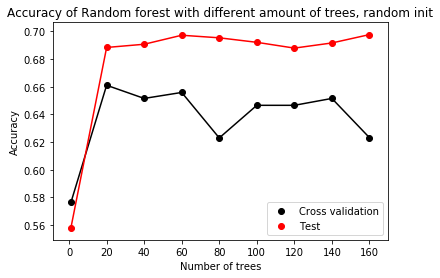

In [144]:
plt.figure()
plt.scatter(tree_amount, tree_plot_acc_valid, color="black", label='Cross validation')
plt.plot(tree_amount, tree_plot_acc_valid, color="black")
plt.scatter(tree_amount, tree_plot_acc_test, color="red", label='Test')
plt.plot(tree_amount, tree_plot_acc_test, color="red")
plt.title('Accuracy of Random forest with different amount of trees, random init')
plt.ylabel('Accuracy')
plt.xlabel('Number of trees')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show() 



The amount of trees do not seem to make a lot of difference with this range, so I think I will go with the default 100 trees. Also the grouping of features does not seem to improve the results.

### Challenge

I will now make the models I will use for the challenge and make the csv with them. I will use all the data to make the model, and random forest classifies. I will use data that has all the 50 mean features, and predict my binary accuracy to be all data cross validation test score 0.86 %. This score I will add manually to the file after adding the other results.

In [79]:
from sklearn.utils import shuffle
X_challenge, y_challenge = shuffle(mean_X, npf['class4'], random_state=0)
rf_challenge_classes =  RandomForestClassifier(random_state=0).fit(X_challenge, y_challenge)
pred_challenge_train = rf_challenge_classes.predict(X_challenge)
acc_train_challenge = accuracy_score(y_challenge,pred_challenge_train)
print('Random forest for classification challenge: \n'+ 
                  'Accuracy with train set: %.2f' % acc_train_challenge
                 )

Random forest for classification challenge: 
Accuracy with train set: 1.00


In [83]:
challence_test_data = pd.read_csv('npf_test_hidden.csv')
all_test_columns = list(challence_test_data.columns)
challence_test_means = challence_test_data.filter(col for col in all_test_columns if 'mean' in col)
feature_names_test = list(map(lambda x: x.replace('.mean', ''), list(challence_test_means.columns)))
challence_test_means.columns = feature_names_test

In [84]:
challence_class_prediction = rf_challenge_classes.predict(challence_test_means)
#challence_class_prediction

In [85]:
import collections
pred_count = collections.Counter(challence_class_prediction)
pred_count

Counter({'nonevent': 559, 'II': 241, 'Ib': 157, 'Ia': 8})

Let's then make the binary probability predictor.

In [86]:
X_challenge_bin, y_challenge_bin = shuffle(mean_X, npf['class2'], random_state=0)
rf_challenge_binary =  RandomForestClassifier(random_state=0).fit(X_challenge_bin, y_challenge_bin)
pred_challenge_train_bin = rf_challenge_binary.predict(X_challenge_bin)
acc_train_challenge_bin = accuracy_score(y_challenge_bin,pred_challenge_train_bin)
print('Random forest for classification challenge: \n'+ 
                  'Accuracy with train set: %.2f' % acc_train_challenge_bin
                 )

Random forest for classification challenge: 
Accuracy with train set: 1.00


In [87]:
challenge_bin_prediction = rf_challenge_binary.predict_proba(challence_test_means)
challenge_bin_prediction

array([[0.12, 0.88],
       [0.76, 0.24],
       [0.  , 1.  ],
       ...,
       [0.46, 0.54],
       [0.62, 0.38],
       [0.03, 0.97]])

In [99]:
challenge_bin_prob_event = challenge_bin_prediction[:,0] # probabilities of events


There is an awful lot of zeros and ones, and these will not be very good for perplexity. Let's first try making more trees.

In [90]:
rf_challenge_binary_200 =  RandomForestClassifier(random_state=0, n_estimators=200).fit(X_challenge_bin, y_challenge_bin)
pred_challenge_train_bin_200 = rf_challenge_binary.predict(X_challenge_bin)
acc_train_challenge_bin_200 = accuracy_score(y_challenge_bin,pred_challenge_train_bin_200)
print('Random forest for classification challenge: \n'+ 
                  'Accuracy with train set: %.2f' % acc_train_challenge_bin_200
                 )

Random forest for classification challenge: 
Accuracy with train set: 1.00


In [100]:
challenge_bin_prediction_200 = rf_challenge_binary_200.predict_proba(challence_test_means)
challenge_bin_prediction_200
challenge_bin_prob_event_200 = challenge_bin_prediction_200[:,0] # probabilities of events


In [101]:
## Did not help.. let's try calibration

from sklearn.calibration import CalibratedClassifierCV

sig_clf = CalibratedClassifierCV(rf_challenge_binary_200, method="sigmoid", cv="prefit")
sig_clf.fit(X_challenge_bin, y_challenge_bin)
sig_clf_probs = sig_clf.predict_proba(challence_test_means)
sig_probs_events = sig_clf_probs[:,0] # probabilities of events



In [203]:
challenge_data = {'class4': challence_class_prediction, 'p': challenge_bin_prob_event}
challenge_result = pd.DataFrame(data=challenge_data)
challenge_result

class4     p
0    nonevent  0.12
1          II  0.76
2    nonevent  0.00
3          Ib  1.00
4          II  0.62
..        ...   ...
960        II  1.00
961        II  0.58
962  nonevent  0.46
963        II  0.62
964  nonevent  0.03

[965 rows x 2 columns]

In [204]:
challenge_result.to_csv('answers.csv', index=False)

In [97]:
after_challenge_data =  {'class4': challence_class_prediction, 'p': sig_probs_events}
after_challenge_result = pd.DataFrame(data=after_challenge_data)
after_challenge_result

class4         p
0    nonevent  0.005373
1          II  0.976049
2    nonevent  0.001261
3          Ib  0.999116
4          II  0.870791
..        ...       ...
960        II  0.999116
961        II  0.854401
962  nonevent  0.457994
963        II  0.943092
964  nonevent  0.001552

[965 rows x 2 columns]

In [98]:
after_challenge_result.to_csv('after_answers.csv', index=False)

Now the perplexity was a lot better

0.867358,0.007358,1.603905,0.681865

Original result

Huhtilainen 0.8673575 0.0073575 Inf 0.6818653

#### Feature selection 

Let's try making predictor with data that has only the top 20 features of random forest.


In [213]:
top_20_mean_X = mean_X[['RHIRGA336','RHIRGA672','RHIRGA84', 'RHIRGA504','RHIRGA42','RHIRGA168','RGlob',
 'H2O168','H2O336','UV_A','CS','Glob','SO2168','H2O84','PTG','H2O672','SWS','PAR','Pamb0', 'H2O42']]
top_20_mean_X

RHIRGA336   RHIRGA672   RHIRGA84  RHIRGA504   RHIRGA42  RHIRGA168  \
rownames                                                                        
2000-02-23  96.532586  101.351071  93.293534  96.752672  92.189052  95.104103   
2000-03-25  60.119150   62.475294  59.184771  60.910915  59.535033  59.672237   
2000-04-06  65.240539   67.481018  64.301856  65.872216  64.822395  65.047844   
2000-04-11  91.022775   93.993988  89.774162  91.875780  89.268844  90.906221   
2000-04-23  60.474385   60.756257  60.506720  60.320374  61.444785  60.907326   
...               ...         ...        ...        ...        ...        ...   
2004-01-31  98.564267   99.693600  96.522000  99.120400  96.242133  96.931200   
2008-08-20  82.909200   83.687467  82.733851  83.148467  82.968243  82.448792   
2009-04-22  43.801016   44.579692  42.498231  43.981473  42.269756  43.097000   
2006-12-12  79.767115   80.828077  79.624510  79.944423  80.626275  79.133269   
2009-11-19  93.185323   93.300952  92.714762  92.602381  92.862540  93.052698   

                RGlob     H2O168     H2O336       UV_A        CS        Glob  \
rownames                                                                       
2000-02-23  67.500843   2.663504   2.695603   8.356761  0.002546  236.605353   
2000-03-25  41.090445   3.253684   3.232222  12.906779  0.000662  252.480327   
2000-04-06  41.006814   4.459042   4.422874  14.286261  0.000541  269.981547   
2000-04-11  10.616065   6.613430   6.568035   4.945162  0.003710   68.364653   
2000-04-23  28.190856   7.934171   7.882727  13.087014  0.003680  242.192619   
...               ...        ...        ...        ...       ...         ...   
2004-01-31   3.888244   3.564667   3.565600   1.021069  0.006578   11.828822   
2008-08-20  12.544272  14.532819  14.401400   7.786232  0.004581  108.429644   
2009-04-22  34.941933   3.581154   3.561860  16.759945  0.002233  297.594773   
2006-12-12   1.288634   6.281731   6.254808   1.173183  0.000809   10.355311   
2009-11-19   4.949853   7.282063   7.255968   1.978373  0.002569   23.973636   

              SO2168      H2O84       PTG     H2O672         SWS         PAR  \
rownames                                                                       
2000-02-23  0.559316   2.613362  0.000964   2.771071  936.605263  339.171515   
2000-03-25  0.138289   3.267582 -0.005340   3.227712  923.450980  487.596401   
2000-04-06  0.107066   4.462515 -0.002910   4.395988  923.410714  515.622611   
2000-04-11  0.323605   6.620694 -0.000718   6.566474  918.862069  147.485058   
2000-04-23  0.366150   7.997957  0.005027   7.843690  919.629032  472.855914   
...              ...        ...       ...        ...         ...         ...   
2004-01-31  2.072133   3.569067  0.000000   3.555600  919.233333   26.818489   
2008-08-20  0.046039  14.699122  0.000129  14.248467  886.806452  233.242567   
2009-04-22  0.366194   3.588077 -0.004153   3.557385  920.532258  602.649622   
2006-12-12  0.002593   6.320980  0.000000   6.212692  922.190476   23.872950   
2009-11-19  0.043235   7.280952  0.007641   7.264444  907.428571   50.787027   

                  Pamb0      H2O42  
rownames                            
2000-02-23  1006.514940   2.548879  
2000-03-25   992.994188   3.299150  
2000-04-06   986.740455   4.509760  
2000-04-11   990.841331   6.627225  
2000-04-23   997.628578   8.106183  
...                 ...        ...  
2004-01-31   978.753644   3.580667  
2008-08-20   984.687789  14.754122  
2009-04-22  1000.054623   3.616504  
2006-12-12   979.799752   6.394510  
2009-11-19   982.155455   7.276667  

[430 rows x 20 columns]

In [215]:
X_train_top20, X_validate_top20, y_train_top20, y_validate_top20 = train_test_split(top_20_mean_X, npf['class4'], test_size=0.50, random_state=0)

In [218]:
dtc_accuracy_cv_top20 = []
dtc_accuracy_test_top20 = []

for train_index, valid_index in kf.split(X_train_top20):
    cross_train_X, cross_valid_X = top_20_mean_X.iloc[train_index], top_20_mean_X.iloc[valid_index]
    cross_train_y, cross_valid_y = y_train_top20.iloc[train_index], y_train_top20.iloc[valid_index]
    
    dtc_top20 =  DecisionTreeClassifier(random_state=0).fit(cross_train_X, cross_train_y)
    pred_valid_dtc = dtc_top20 .predict(cross_valid_X)
    acc_valid_dtc = accuracy_score(cross_valid_y,pred_valid_dtc)
    
    pred_test_dtc = dtc_top20.predict(X_validate_top20)
    acc_test_dtc = accuracy_score(y_validate_top20,pred_test_dtc)
    
    dtc_accuracy_cv_top20.append(acc_valid_dtc)
    dtc_accuracy_test_top20.append(acc_test_dtc)
    

cross_valid_av_dtc_top20 = sum(dtc_accuracy_cv_top20)/len(dtc_accuracy_cv_top20)
test_av_dtc_top20 = sum(dtc_accuracy_test_top20)/len(dtc_accuracy_test_top20)
print('Decision tree cross validation: \n' +
      'Average accuracy with cross validation set: %.2f' % cross_valid_av_dtc_top20 +'\n' +
      'Average accuracy with test set: %.2f' % test_av_dtc_top20
     )

Decision tree cross validation: 
Average accuracy with cross validation set: 0.34
Average accuracy with test set: 0.38


Restricting the variable in this manner seems to do horros to the accuracy, decision tree is now down to 34-38 %. Let's see what happens to random forest.

In [225]:
rf_accuracy_cv_top20 = []
rf_accuracy_test_top20 = []

for train_index, valid_index in kf.split(X_train_top20):
    cross_train_X, cross_valid_X = top_20_mean_X.iloc[train_index], top_20_mean_X.iloc[valid_index]
    cross_train_y, cross_valid_y = y_train_top20.iloc[train_index], y_train_top20.iloc[valid_index]

    rf_top20 =  DecisionTreeClassifier(random_state=0).fit(cross_train_X, cross_train_y)
    pred_valid_rf = dtc_top20 .predict(cross_valid_X)
    acc_valid_rf = accuracy_score(cross_valid_y,pred_valid_rf)
    
    pred_test_rf = dtc_top20.predict(X_validate_top20)
    acc_test_rf = accuracy_score(y_validate_top20,pred_test_rf)
    
    rf_accuracy_cv_top20.append(acc_valid_rf)
    rf_accuracy_test_top20.append(acc_test_rf)
    

cross_valid_av_rf_top20 = sum(rf_accuracy_cv_top20)/len(rf_accuracy_cv_top20)
test_av_rf_top20 = sum(rf_accuracy_test_top20)/len(rf_accuracy_test_top20)
print('Decision tree cross validation: \n' +
      'Average accuracy with cross validation set: %.2f' % cross_valid_av_rf_top20 +'\n' +
      'Average accuracy with test set: %.2f' % test_av_rf_top20 
     )

Decision tree cross validation: 
Average accuracy with cross validation set: 0.94
Average accuracy with test set: 0.39


When restricting the features with random forest, there are now symptoms of overfitting, as the cross validation accuracy is 0.94 but the testing accuracy has gone down to 39 %.

This approach seems no good at all.

### Binary classification test with one independent variable

When going through the data explorations for the pitch, I glimpsed at the RHINGA boxplot that was done for the first exercise: for two classes the separation seemed quite obvious.

I want to try some very simple approach, using just one explaining variable with logistic regression.

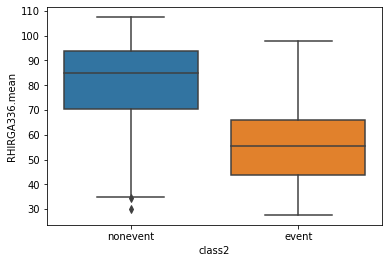

In [232]:
#  Producing side-by-side boxplots of RHIRGA84.mean versus event.
sns.boxplot(x="class2", y="RHIRGA336.mean", data=npf)

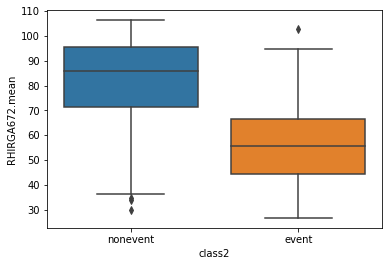

In [233]:
#  Producing side-by-side boxplots of RHIRGA84.mean versus event.
sns.boxplot(x="class2", y="RHIRGA672.mean", data=npf)

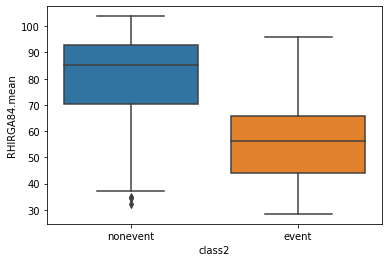

In [234]:
#  Producing side-by-side boxplots of RHIRGA84.mean versus event.
sns.boxplot(x="class2", y="RHIRGA84.mean", data=npf)


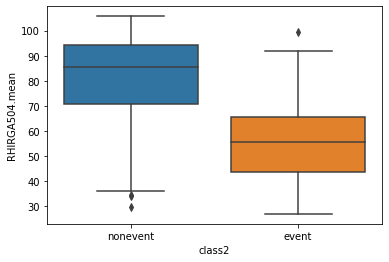

In [235]:
#  Producing side-by-side boxplots of RHIRGA84.mean versus event.
sns.boxplot(x="class2", y="RHIRGA504.mean", data=npf)

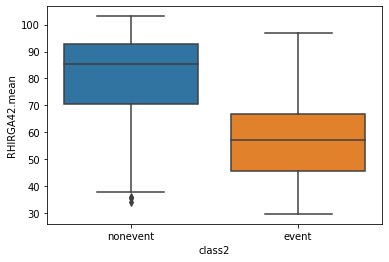

In [236]:
#  Producing side-by-side boxplots of RHIRGA84.mean versus event.
sns.boxplot(x="class2", y="RHIRGA42.mean", data=npf)

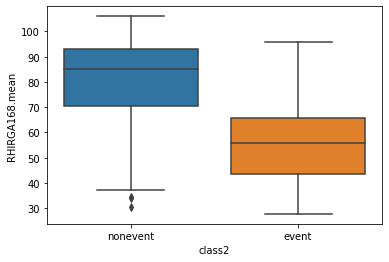

In [237]:
#  Producing side-by-side boxplots of RHIRGA84.mean versus event.
sns.boxplot(x="class2", y="RHIRGA168.mean", data=npf)

Feature selection combination

default settings to models
50 mean values, month, aggregated, feature sel. 

In [58]:
rf_accuracy_valid_features = [0.64, 0.65, 0.65, 0.94]
rf_accuracy_test_features = [0.63, 0.63, 0.68, 0.39]

dt_accuracy_valid_features = [0.58, 0.62, 0.61, 0.34]
dt_accuracy_test_features = [0.60, 0.63, 0.61, 0.38]

feat_names = ['50 means', 'month', 'grouped', 'feature selection']
features_x = [1, 2, 3, 4]

# RF

#Random forest cross validation  50: 
#Average accuracy with cross validation set: 0.64
#Average accuracy with test set: 0.63

#Random forest cross validation month: 
#Average accuracy with cross validation set: 0.65
#Average accuracy with test set: 0.63

#Random forest cross validation for grouped feature classification: 
#Average accuracy with cross validation set: 0.65
#Average accuracy with test set: 0.68

#Decision tree cross validation: 
#Average accuracy with cross validation set: 0.94
#Average accuracy with test set: 0.39

# DT

#Decision tree cross validation 50: 
#Average accuracy with cross validation set: 0.58
#Average accuracy with test set: 0.60

#Decision tree cross validation month added: 
#Average accuracy with cross validation set: 0.62
#Average accuracy with test set: 0.63

#Decision tree cross validation for grouped feature classification: 
#Average accuracy with cross validation set: 0.61
#Average accuracy with test set: 0.61

#Decision tree cross validation: 
#Average accuracy with cross validation set: 0.34
#Average accuracy with test set: 0.38


#1b9e77
#d95f02
#7570b3
#e7298a

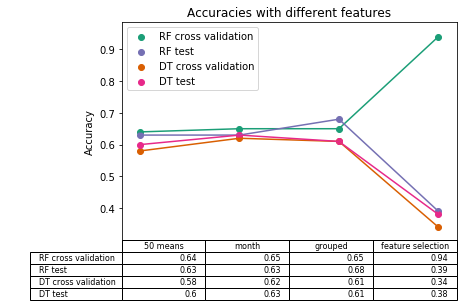

In [66]:
labels_feat = ['RF cross validation', 'RF test', 'DT cross validation', 'DT test']
plt.figure()
plt.scatter(feature_x, rf_accuracy_valid_features, color="#1b9e77", label=labels_feat[0])
plt.plot(feature_x, rf_accuracy_valid_features, color="#1b9e77")

plt.scatter(feature_x,rf_accuracy_test_features, color="#7570b3", label=labels_feat[1])
plt.plot(feature_x, rf_accuracy_test_features, color="#7570b3")

plt.scatter(feature_x, dt_accuracy_valid_features, color="#d95f02", label=labels_feat[2])
plt.plot(feature_x, dt_accuracy_valid_features, color="#d95f02")

plt.scatter(feature_x, dt_accuracy_test_features, color="#e7298a", label=labels_feat[3])
plt.plot(feature_x, dt_accuracy_test_features, color="#e7298a")

#plt.xticks(feature_x, feat_names)
plt.xticks([])
plt.title('Accuracies with different features')
plt.ylabel('Accuracy')
#plt.xlabel('Method')
plt.legend(loc='best', shadow=False, scatterpoints=1)

# Add a table at the bottom of the axes
the_table = plt.table(cellText=[rf_accuracy_valid_features, rf_accuracy_test_features, 
                                dt_accuracy_valid_features,dt_accuracy_test_features],
                      rowLabels=labels_feat,
                      colLabels=feat_names,
                      loc='bottom')


plt.show() 

### Testing an after thought model

Use grouping, 60 trees for multi


In [166]:
X_challenge_group_ac, y_challenge_group_ac = shuffle(mean_X_grouped, npf['class4'], random_state=0)
rf_challenge_classes_ac_group =  RandomForestClassifier(n_estimators=60, random_state=0).fit(X_challenge_group_ac, y_challenge_group_ac)
pred_challenge_train_ac = rf_challenge_classes_ac_group.predict(X_challenge_group_ac)
acc_train_challenge_ac = accuracy_score(y_challenge_group_ac,pred_challenge_train_ac)
print('Random forest for classification challenge: \n'+ 
                  'Accuracy with train set: %.2f' % acc_train_challenge_ac
                 )

Random forest for classification challenge: 
Accuracy with train set: 1.00


In [170]:
challence_test_means
co_c = challence_test_means[['CO2168','CO2336','CO242','CO2504']].mean(axis=1)
h2o_c = challence_test_means[['H2O168', 'H2O336','H2O42','H2O504','H2O672','H2O84']].mean(axis=1)
no_c = challence_test_means[[ 'NO168','NO336','NO42','NO504','NO672','NO84']].mean(axis=1)
nox_c = challence_test_means[[ 'NOx168','NOx336','NOx42','NOx504','NOx672','NOx84']].mean(axis=1)
o_c = challence_test_means[[ 'O3168','O342','O3504','O3672','O384']].mean(axis=1)
rhinga_c = challence_test_means[['RHIRGA168','RHIRGA336','RHIRGA42','RHIRGA504','RHIRGA672','RHIRGA84']].mean(axis=1)
t_c = challence_test_means[['T168','T42','T504','T672','T84']].mean(axis=1)

chal_mean_X_grouped = challence_test_means[['Glob', 'NET', 'Pamb0','PAR','PTG','RGlob', 'RPAR','SO2168','SWS','UV_A', 'UV_B', 'CS']]
chal_mean_X_grouped = chal_mean_X_grouped.assign(CO = co_c.values)
chal_mean_X_grouped =chal_mean_X_grouped.assign(H2O = h2o_c.values)
chal_mean_X_grouped =chal_mean_X_grouped.assign(NO = no_c.values)
chal_mean_X_grouped =chal_mean_X_grouped.assign(NOX = nox_c.values)
chal_mean_X_grouped =chal_mean_X_grouped.assign(O = o_c.values)
chal_mean_X_grouped =chal_mean_X_grouped.assign(RHINGA = rhinga_c.values)
chal_mean_X_grouped =chal_mean_X_grouped.assign(T = t_c.values)


In [171]:
pred_after_group_classes = rf_challenge_classes_ac_group.predict(chal_mean_X_grouped)
pred_after_group_classes

array(['nonevent', 'nonevent', 'nonevent', 'Ib', 'nonevent', 'II', 'II',
       'nonevent', 'II', 'Ib', 'II', 'Ib', 'II', 'II', 'II', 'II', 'II',
       'nonevent', 'nonevent', 'II', 'II', 'Ib', 'II', 'II', 'Ib', 'II',
       'II', 'nonevent', 'nonevent', 'nonevent', 'II', 'II', 'nonevent',
       'II', 'nonevent', 'nonevent', 'nonevent', 'Ib', 'nonevent',
       'nonevent', 'nonevent', 'nonevent', 'nonevent', 'nonevent',
       'nonevent', 'nonevent', 'nonevent', 'II', 'Ib', 'II', 'nonevent',
       'nonevent', 'nonevent', 'nonevent', 'nonevent', 'nonevent', 'II',
       'nonevent', 'nonevent', 'nonevent', 'Ib', 'nonevent', 'II',
       'nonevent', 'nonevent', 'Ib', 'II', 'Ib', 'II', 'nonevent', 'II',
       'nonevent', 'Ib', 'nonevent', 'nonevent', 'nonevent', 'nonevent',
       'nonevent', 'nonevent', 'Ib', 'II', 'nonevent', 'II', 'II', 'II',
       'II', 'II', 'Ib', 'II', 'nonevent', 'II', 'nonevent', 'II',
       'nonevent', 'nonevent', 'Ib', 'nonevent', 'nonevent', 'nonevent',
  

In [172]:
X_challenge_bin_ac, y_challenge_bin_ac = shuffle(mean_X_grouped, npf['class2'], random_state=0)
rf_challenge_binary_ac_group =  RandomForestClassifier(n_estimators=60, random_state=0).fit(X_challenge_bin_ac, y_challenge_bin_ac)
pred_challenge_train_ac_bin = rf_challenge_binary_ac_group.predict(X_challenge_bin_ac)
acc_train_challenge_ac_bin = accuracy_score(y_challenge_bin_ac,pred_challenge_train_ac_bin)
print('Random forest for classification challenge after binary: \n'+ 
                  'Accuracy with train set: %.2f' % acc_train_challenge_ac_bin
                 )


Random forest for classification challenge after binary: 
Accuracy with train set: 1.00


In [173]:
sig_clf_af_group = CalibratedClassifierCV(rf_challenge_binary_ac_group, method="sigmoid", cv="prefit")
sig_clf_af_group.fit(X_challenge_bin_ac,y_challenge_bin_ac)
sig_clf_probs_ac_group = sig_clf_af_group.predict_proba(chal_mean_X_grouped)
sig_probs_events_ac_group = sig_clf_probs_ac_group[:,0] # probabilities of events

In [175]:
challenge_data_af_group = {'class4': pred_after_group_classes, 'p': sig_probs_events_ac_group}
challenge_result_group_af = pd.DataFrame(data=challenge_data_af_group)
challenge_result_group_af

class4         p
0    nonevent  0.014063
1    nonevent  0.830858
2    nonevent  0.000863
3          Ib  0.998810
4    nonevent  0.190617
..        ...       ...
960        II  0.998810
961        II  0.754800
962  nonevent  0.017699
963        II  0.658594
964  nonevent  0.002771

[965 rows x 2 columns]

In [176]:
challenge_result_group_af.to_csv('after_answers_group.csv', index=False)

In [177]:
sig_clf_af_group

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                               

In [178]:
rf_challenge_binary_ac_group

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [185]:
pd.__version__

'1.0.1'